<a href="https://colab.research.google.com/github/Jehadel/reestimator/blob/outliersAP/Anna_reestimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv('https://files.data.gouv.fr/geo-dvf/latest/csv/2019/full.csv.gz')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,12,14,16,17,18,20,22,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_19=df1.copy()

In [ ]:
df_19_type_local=df_19.dropna(subset=['type_local'])

In [ ]:
df_19_type_local.type_local.value_counts()

Maison                                      698631
Appartement                                 614886
Dépendance                                  450801
Local industriel. commercial ou assimilé    136703
Name: type_local, dtype: int64

In [ ]:
df_M_A_D_19 = df_19_type_local[df_19_type_local.type_local !='Local industriel. commercial ou assimilé']

In [ ]:
rslt_df = df_M_A_D_19[(df_M_A_D_19['type_local'] != 'Dépendance')]

In [ ]:
rslt_df.type_local.value_counts()

Maison         698631
Appartement    614886
Name: type_local, dtype: int64

In [ ]:
df_A_19 = rslt_df[(rslt_df['type_local'] != 'Maison')]

In [ ]:
df_A_19.shape

(614886, 40)

In [ ]:
A_19_int = df_A_19[df_A_19['surface_reelle_bati'].notna()]

In [ ]:
A_19_int.shape

(614867, 40)

In [ ]:
A_19_int1 = A_19_int[A_19_int['valeur_fonciere'] >= 4500.0]

In [ ]:
A_19_int1.shape

(607545, 40)

In [ ]:
A_19_int2 =A_19_int1[ A_19_int1['surface_reelle_bati'] >= 9.0]

In [ ]:
A_19_int2.shape

(606245, 40)

In [ ]:
# the "&" sign represents a boolean AND
subset_AND = df[~(df["Sales Budget"]<=30000) & (df["Sales Person"] =="Maria") ]
subset_AND.head()

In [ ]:
A_19_int3_1=A_19_int2[(A_19_int2['code_departement']!=974) & (A_19_int2['code_departement']!=973) & (A_19_int2['code_departement']!=18)]

In [ ]:
A_19_int3_1.shape

(596415, 40)

In [ ]:
A_19_int3 = A_19_int3_1.sort_values(by = ['valeur_fonciere'])

In [ ]:
A_19_int3.loc[:,'prixmetre'] = A_19_int3['valeur_fonciere'].values / A_19_int3['surface_reelle_bati'].values

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
A_19_int3

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,prixmetre
120584,2019-47094,2019-01-28,2,Vente,4500.00,43.00,NaN,RUE ROSSINI,5600,6000.00,6088,Nice,6,nan,NaN,06088000KY0139,NaN,NaN,10,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,1,2.00,Appartement,52.00,3.00,NaN,NaN,NaN,NaN,nan,7.26,43.70,86.54
419163,2019-175400,2019-07-23,1,Vente,4500.00,14.00,NaN,RUE DES CHANOINES,1520,14000.00,14118,Caen,14,nan,NaN,14118000KO0013,NaN,NaN,115.00,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,1,2.00,Appartement,95.00,4.00,NaN,NaN,NaN,NaN,nan,-0.36,49.19,47.37
155163,2019-65335,2019-07-04,1,Vente,4500.00,2.00,NaN,RUE DE L OUEST,1180,6110.00,6030,Le Cannet,6,nan,NaN,06030000AZ0728,NaN,NaN,80.00,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,1,2.00,Appartement,23.00,1.00,NaN,NaN,NaN,NaN,nan,7.02,43.57,195.65
155162,2019-65335,2019-07-04,1,Vente,4500.00,2.00,NaN,RUE DE L OUEST,1180,6110.00,6030,Le Cannet,6,nan,NaN,06030000AZ0728,NaN,NaN,83.00,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,1,2.00,Appartement,23.00,1.00,NaN,NaN,NaN,NaN,nan,7.02,43.57,195.65
2335215,2019-971996,2019-01-23,1,Vente,4500.00,8.00,NaN,RUE JEANNE - MARIE CELU,3850,69004.00,69384,Lyon 4e Arrondissement,69,nan,NaN,69384000BE0092,NaN,NaN,155.00,nan,156.00,nan,NaN,nan,nan,nan,nan,nan,2,2.00,Appartement,166.00,8.00,NaN,NaN,NaN,NaN,nan,4.84,45.78,27.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3503883,2019-1494757,2019-12-31,1,Vente,318200000.00,252.00,NaN,RUE DE VAUGIRARD,9624,75015.00,75115,Paris 15e Arrondissement,75,nan,NaN,75115000BU0068,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,0,2.00,Appartement,75.00,3.00,S,sols,NaN,NaN,467.00,2.30,48.84,4242666.67
3503880,2019-1494757,2019-12-31,1,Vente,318200000.00,252.00,NaN,RUE DE VAUGIRARD,9624,75015.00,75115,Paris 15e Arrondissement,75,nan,NaN,75115000BU0068,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,0,2.00,Appartement,95.00,4.00,S,sols,NaN,NaN,467.00,2.30,48.84,3349473.68
3503953,2019-1494757,2019-12-31,1,Vente,318200000.00,47.00,NaN,AV DE LA MOTTE PICQUET,5308,75015.00,75115,Paris 15e Arrondissement,75,nan,NaN,75115000DE0055,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,0,2.00,Appartement,105.00,4.00,S,sols,NaN,NaN,294.00,2.30,48.85,3030476.19
3503996,2019-1494757,2019-12-31,1,Vente,318200000.00,24.00,NaN,BD DE GRENELLE,4310,75015.00,75115,Paris 15e Arrondissement,75,nan,NaN,75115000DQ0020,NaN,NaN,13,nan,8,nan,NaN,nan,nan,nan,nan,nan,2,2.00,Appartement,57.00,2.00,NaN,NaN,NaN,NaN,nan,2.29,48.85,5582456.14


In [ ]:
A_19_int4 = A_19_int3[A_19_int3['prixmetre'] >= 500.00]

In [ ]:
A_19_int4.shape

(589823, 41)

In [ ]:
import seaborn as sns

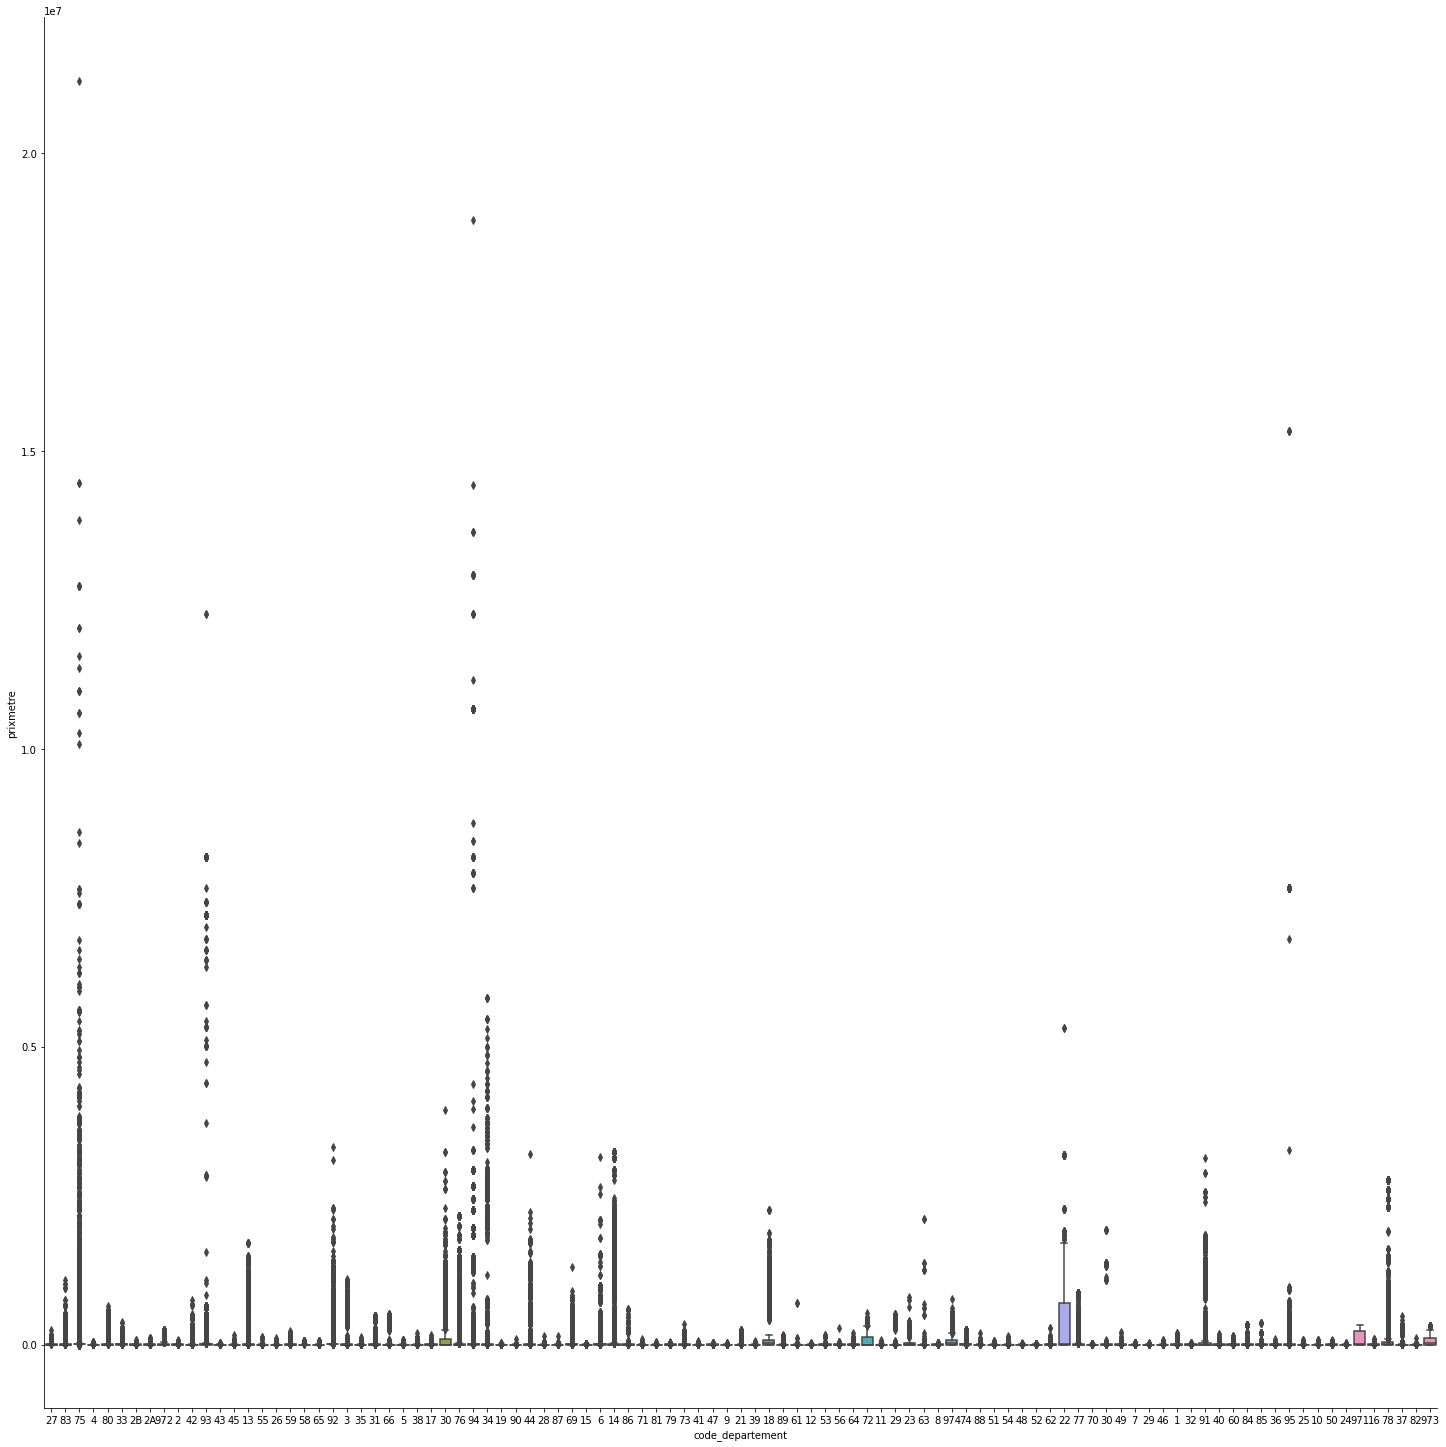

In [ ]:
sns.catplot(x='code_departement', y='prixmetre', data=A_19_int4, kind="box",height=20, aspect=1)

In [ ]:
A_19_int5 = A_19_int4.sort_values(by = ['prixmetre'],ascending=False)

In [ ]:
A_19_int5.head(32500)

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,prixmetre
3503938,2019-1494757,2019-12-31,1,Vente,318200000.00,47.00,NaN,AV DE LA MOTTE PICQUET,5308,75015.00,75115,Paris 15e Arrondissement,75,nan,NaN,75115000DE0055,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,0,2.00,Appartement,15.00,1.00,S,sols,NaN,NaN,294.00,2.30,48.85,21213333.33
3350289,2019-1414144,2019-07-08,1,Vente,245365904.00,2.00,NaN,PL MARCEL THIROUIN,1231,94150.00,94065,Rungis,94,nan,NaN,940650000I0170,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,0,2.00,Appartement,13.00,1.00,S,sols,NaN,NaN,6814.00,2.35,48.75,18874300.31
3387610,2019-1433056,2019-07-08,1,Vente,245365904.00,39.00,NaN,RUE DE LA MARNE,0300,95610.00,95218,Éragny,95,nan,NaN,95218000AZ0034,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,0,2.00,Appartement,16.00,1.00,S,sols,NaN,NaN,4048.00,2.10,49.02,15335369.00
3387590,2019-1433056,2019-07-08,1,Vente,245365904.00,39.00,NaN,RUE DE LA MARNE,0300,95610.00,95218,Éragny,95,nan,NaN,95218000AZ0034,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,0,2.00,Appartement,16.00,1.00,S,sols,NaN,NaN,4048.00,2.10,49.02,15335369.00
3387572,2019-1433056,2019-07-08,1,Vente,245365904.00,39.00,NaN,RUE DE LA MARNE,0300,95610.00,95218,Éragny,95,nan,NaN,95218000AZ0034,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,0,2.00,Appartement,16.00,1.00,S,sols,NaN,NaN,4048.00,2.10,49.02,15335369.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390450,2019-999565,2019-04-01,1,Vente,7262549.50,95.00,NaN,RTE DE LA LIBERATION,0650,69110.00,69202,Sainte-Foy-lès-Lyon,69,nan,NaN,69202000AX0055,NaN,NaN,21.00,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,1,2.00,Appartement,47.00,2.00,NaN,NaN,NaN,NaN,nan,4.78,45.73,154522.33
2674056,2019-1117198,2019-11-28,1,Vente,7571250.00,14.00,NaN,AV JEAN JAURES,1388,77176.00,77445,Savigny-le-Temple,77,nan,NaN,77445000AT0196,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,0,2.00,Appartement,49.00,2.00,S,sols,NaN,NaN,2798.00,2.58,48.60,154515.31
329342,2019-130856,2019-07-01,1,Vente,5715500.00,54.00,NaN,CHE DU RUISSEAU MIRABEAU,8201,13016.00,13216,Marseille 16e Arrondissement,13,nan,NaN,132169100C0137,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,0,2.00,Appartement,37.00,1.00,S,sols,NaN,NaN,5197.00,5.35,43.35,154472.97
329386,2019-130856,2019-07-01,1,Vente,5715500.00,70.00,NaN,CHE DU RUISSEAU MIRABEAU,8201,13016.00,13216,Marseille 16e Arrondissement,13,nan,NaN,132169100C0180,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,0,2.00,Appartement,37.00,1.00,S,sols,NaN,NaN,5567.00,5.35,43.35,154472.97


In [ ]:
A_19_int6 = A_19_int5[A_19_int5['prixmetre'] <= 20000]

In [ ]:
A_19_int6.shape

(525465, 41)

In [ ]:
print(A_19_int6['code_departement'].dtypes)


object


In [ ]:
# A_19_int6['code_departement'].astype(str).astype(int)

In [ ]:
Result_A7=A_19_int6.drop_duplicates(subset=['id_mutation'])

In [ ]:
Result_A7.shape

(444230, 41)

In [ ]:
Result_A8=outliers(Result_A7)

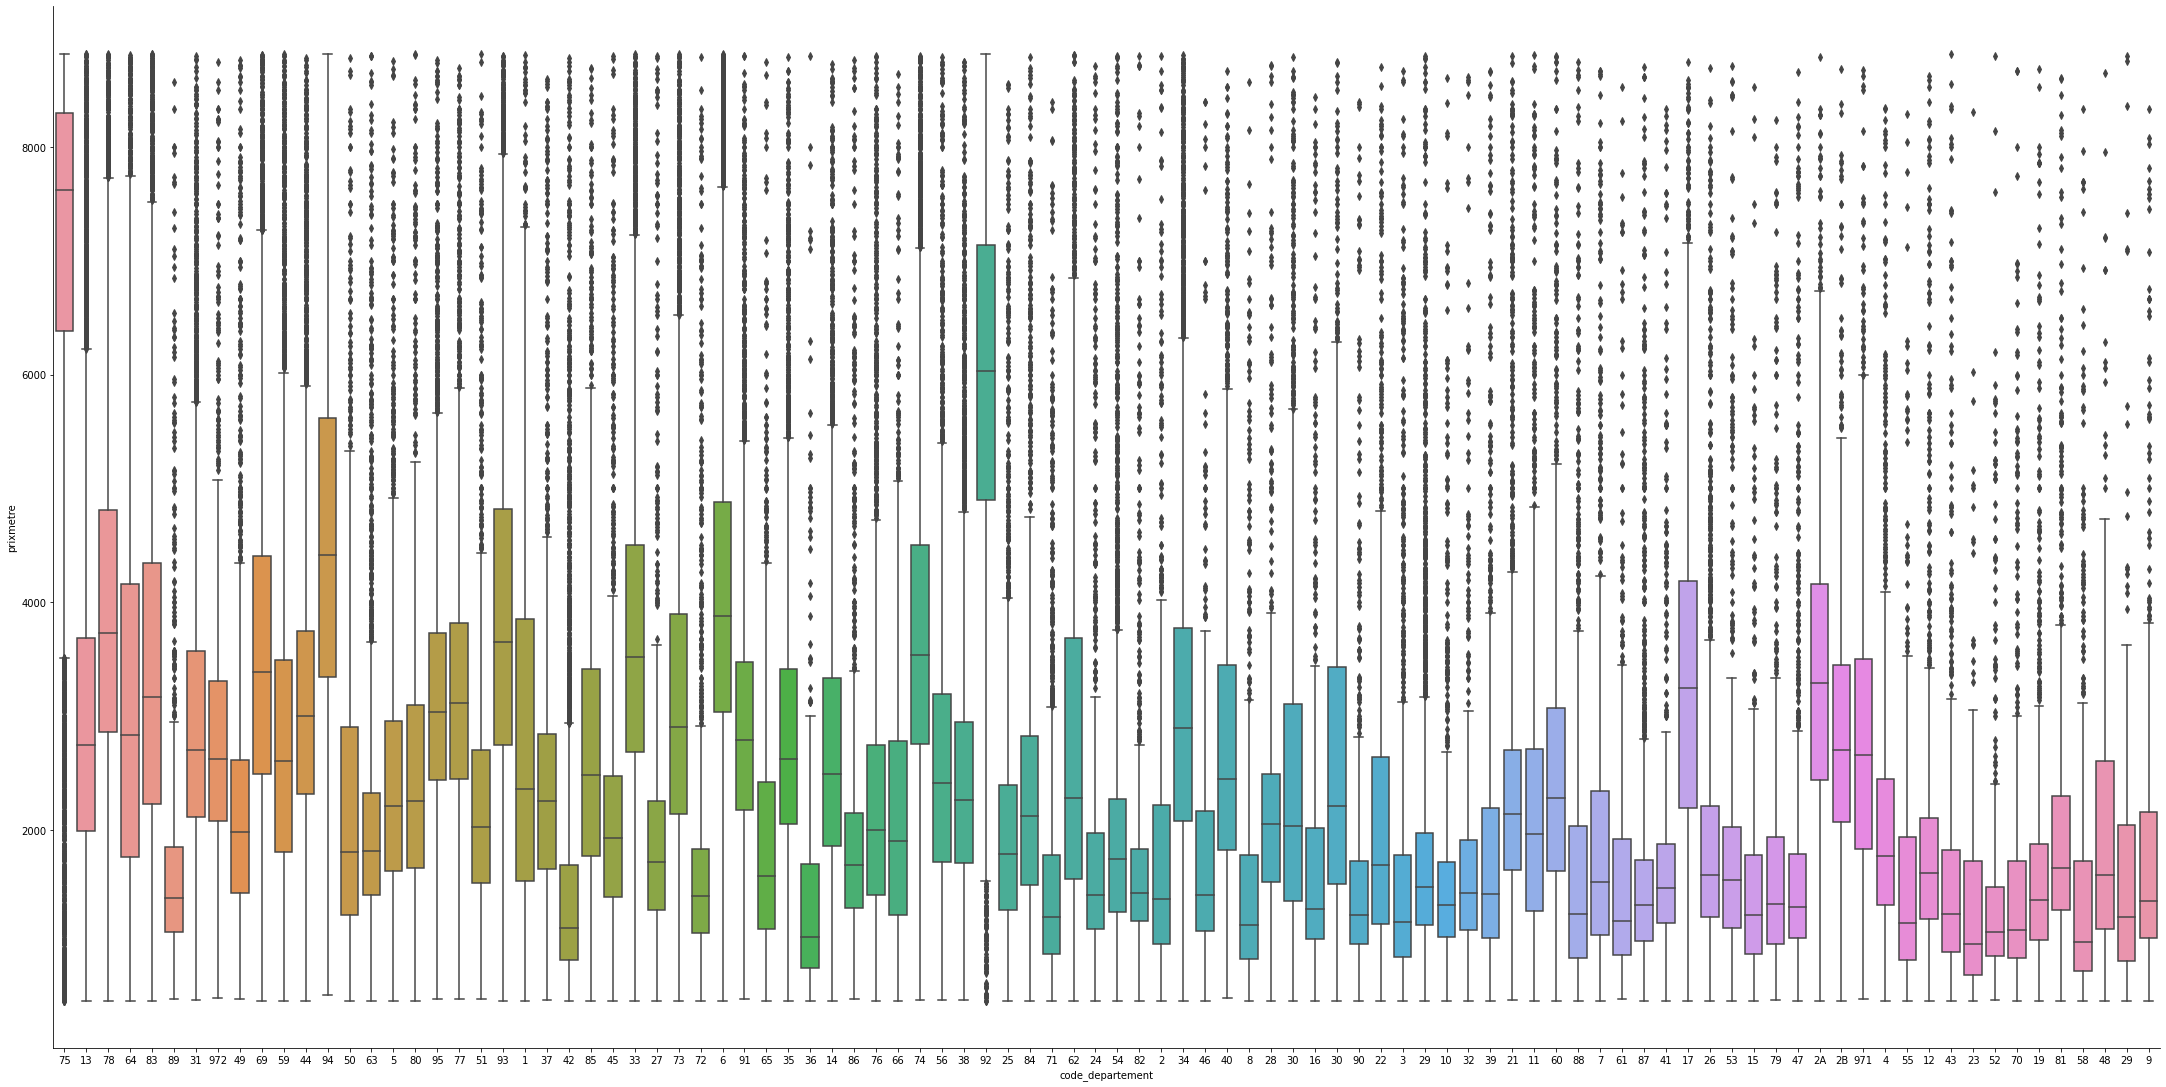

In [ ]:
sns.catplot(x='code_departement', y='prixmetre', data=Result_A8, kind="box",height=15, aspect=2) #showfliers=False

In [ ]:
A_19_int6[A_19_int6['code_departement']==31].shape

(15720, 41)

In [ ]:
A_19_int6[A_19_int6['code_departement']==27].shape

(2244, 41)

In [ ]:
# sns.catplot(x='code_departement', y='prixmetre', data=A_19_int6, kind="box",height=15, aspect=2)

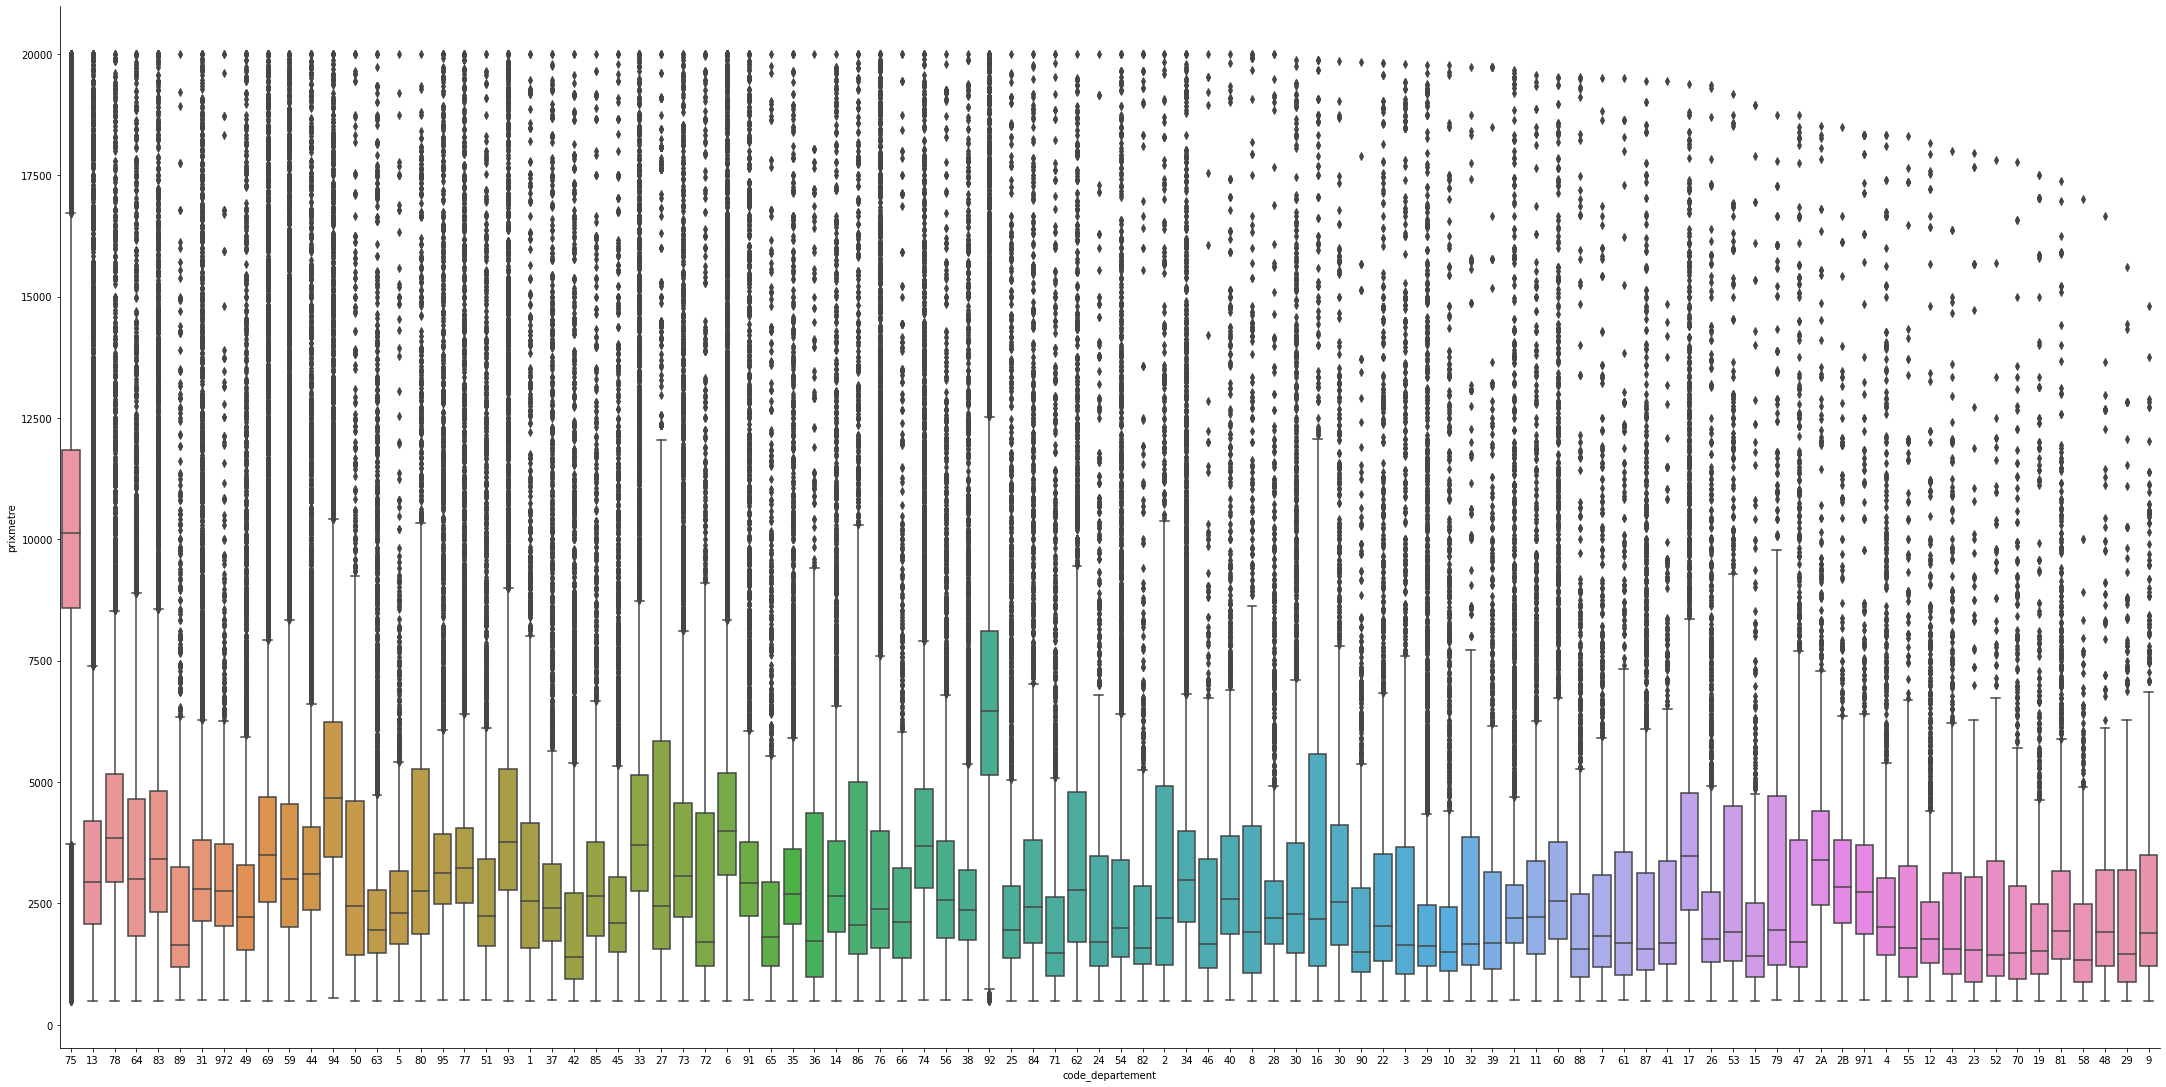

In [ ]:
sns.catplot(x='code_departement', y='prixmetre', data=A_19_int6, kind="box",height=15, aspect=2) #showfliers=False

In [ ]:
Result_A6=outliers(A_19_int6)

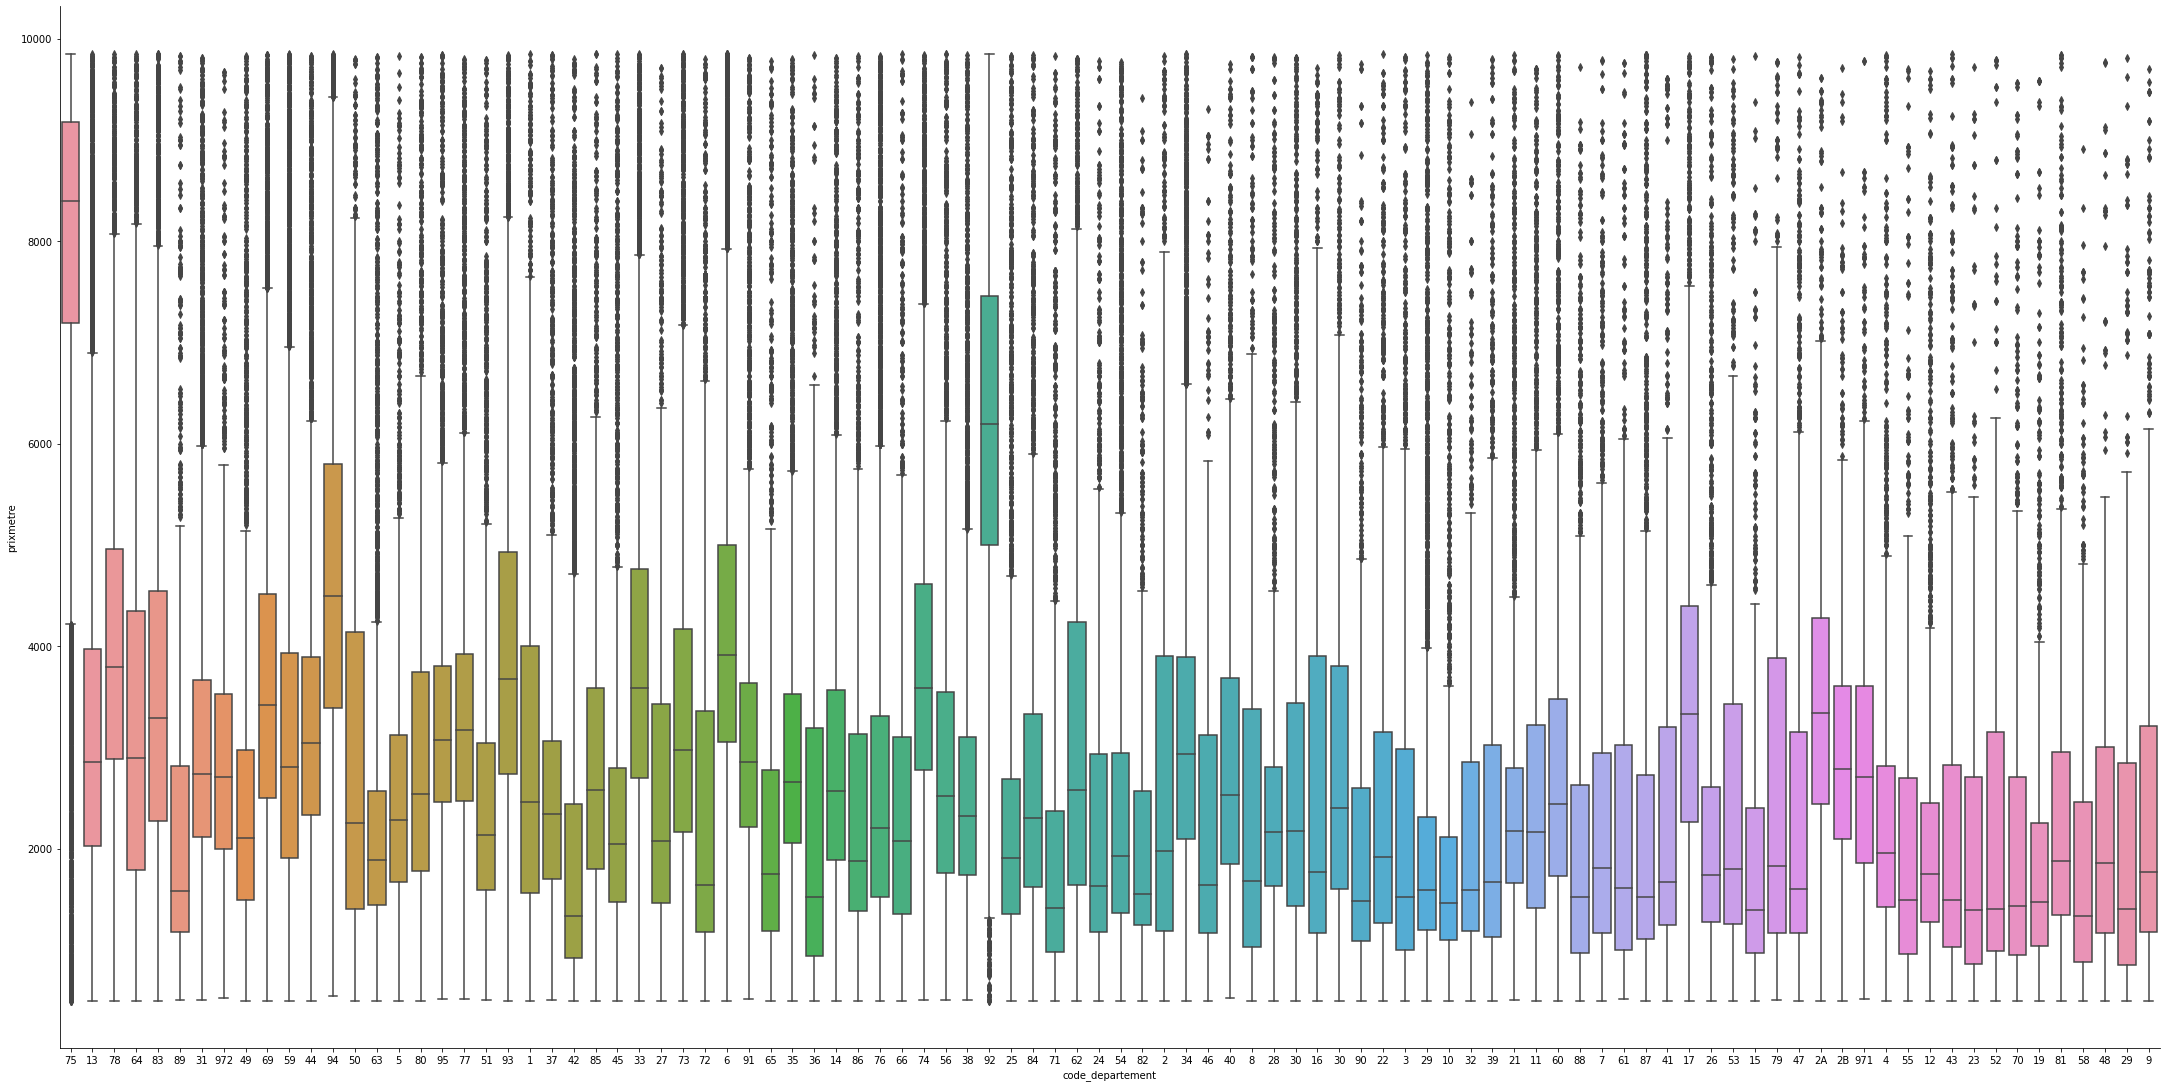

In [ ]:
sns.catplot(x='code_departement', y='prixmetre', data=Result_A6, kind="box",height=15, aspect=2)

In [ ]:
df_M_19 = rslt_df[(rslt_df['type_local'] != 'Appartement')]

In [ ]:
df_M_19.shape

(698631, 40)

In [ ]:
M_19_int = df_M_19[df_M_19['surface_reelle_bati'].notna()]

In [ ]:
M_19_int.shape

(698617, 40)

In [ ]:
M_19_int1 = M_19_int[M_19_int['valeur_fonciere'] >= 13500.0]

In [ ]:
M_19_int1.shape

(689304, 40)

In [ ]:
M_19_int2 =M_19_int1[M_19_int1['surface_reelle_bati'] >= 27.0]

In [ ]:
M_19_int2.shape

(682742, 40)

In [ ]:
M_19_int3_1=M_19_int2[(M_19_int2['code_departement']!=974) & (M_19_int2['code_departement']!=973) & (M_19_int2['code_departement']!=18)]

In [ ]:
M_19_int3_1.shape

(673193, 40)

In [ ]:
M_19_int3 = M_19_int3_1.sort_values(by = ['valeur_fonciere'])

In [ ]:
M_19_int3.loc[:,'prixmetre'] = M_19_int3['valeur_fonciere'].values / M_19_int3['surface_reelle_bati'].values

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
M_19_int4 = M_19_int3[M_19_int3['prixmetre'] >= 500.00]

In [ ]:
M_19_int4.shape

(649971, 41)

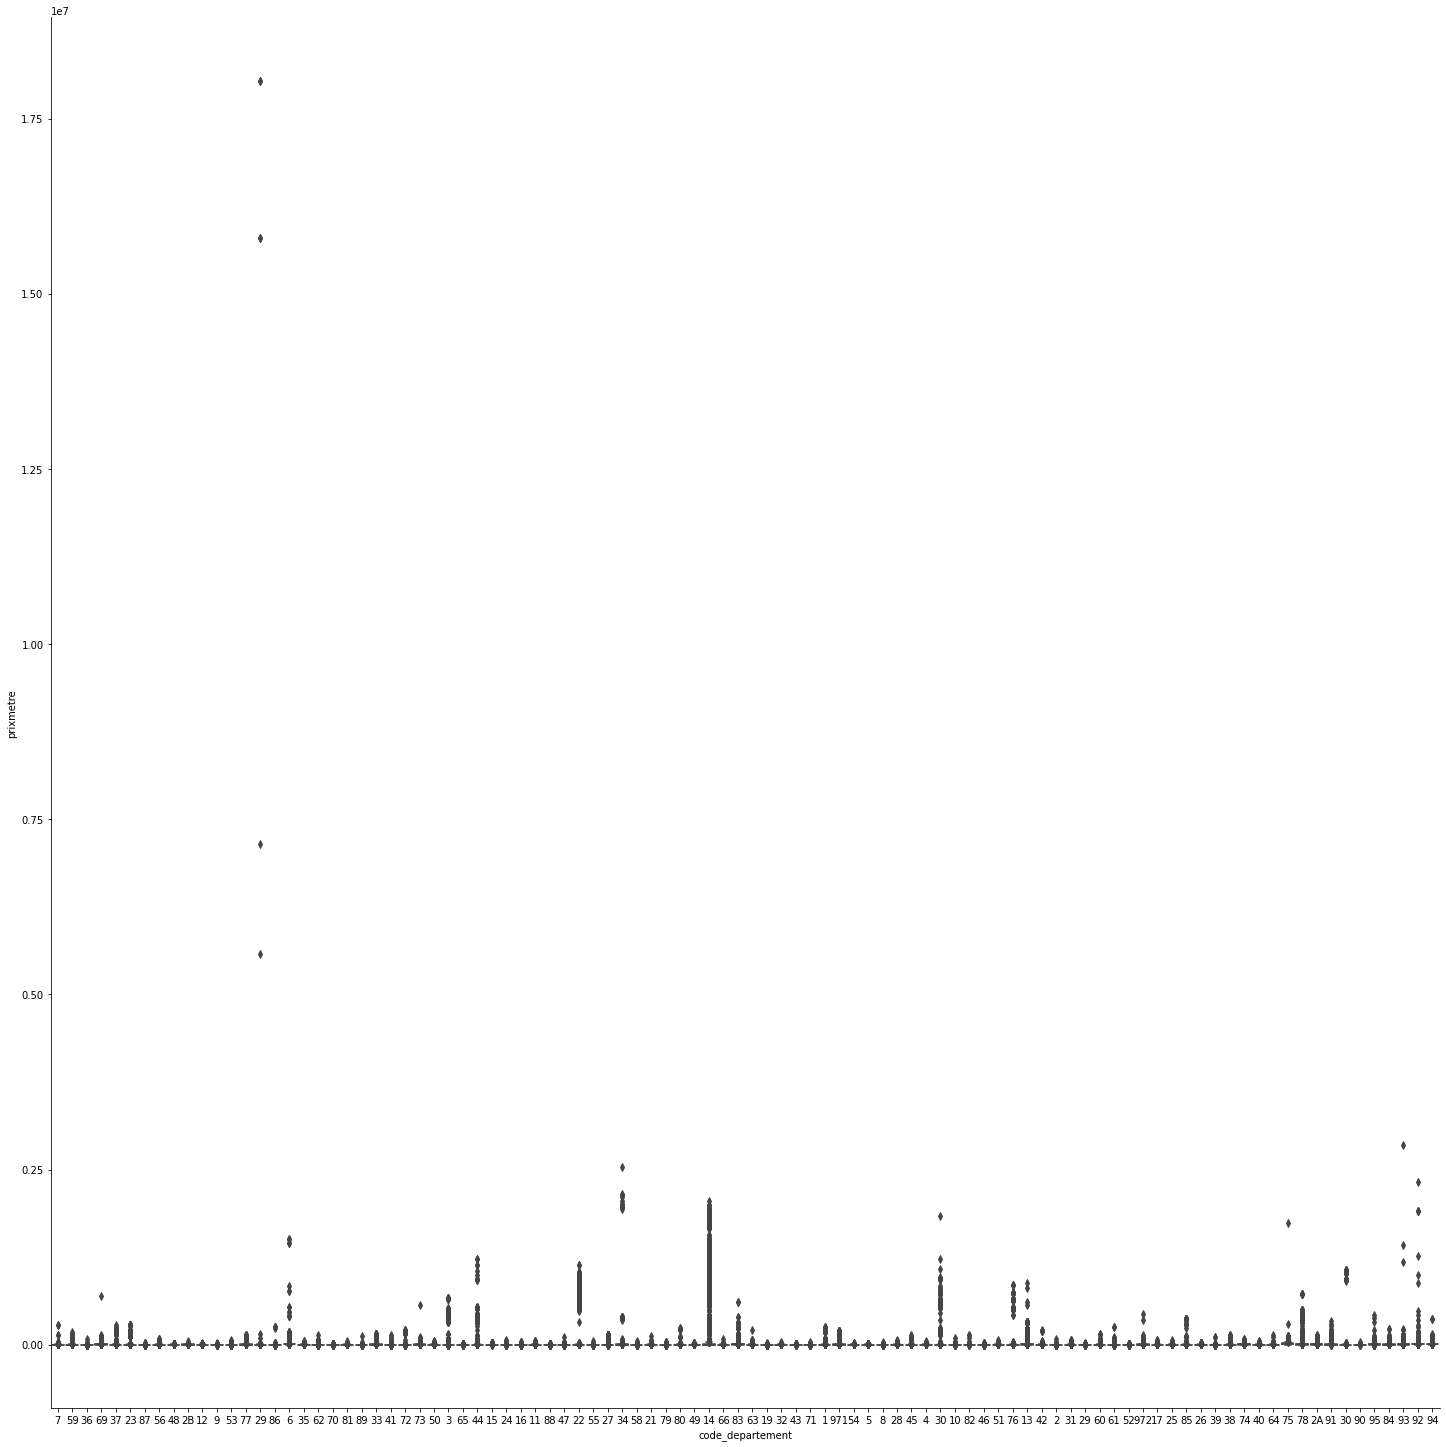

In [ ]:
sns.catplot(x='code_departement', y='prixmetre', data=M_19_int4, kind="box",height=20, aspect=1)

In [ ]:
M_19_int5 = M_19_int4.sort_values(by = ['prixmetre'],ascending=False)

In [ ]:
M_19_int6 = M_19_int5[M_19_int5['prixmetre'] <= 160000]

In [ ]:
M_19_int6.shape

(644976, 41)

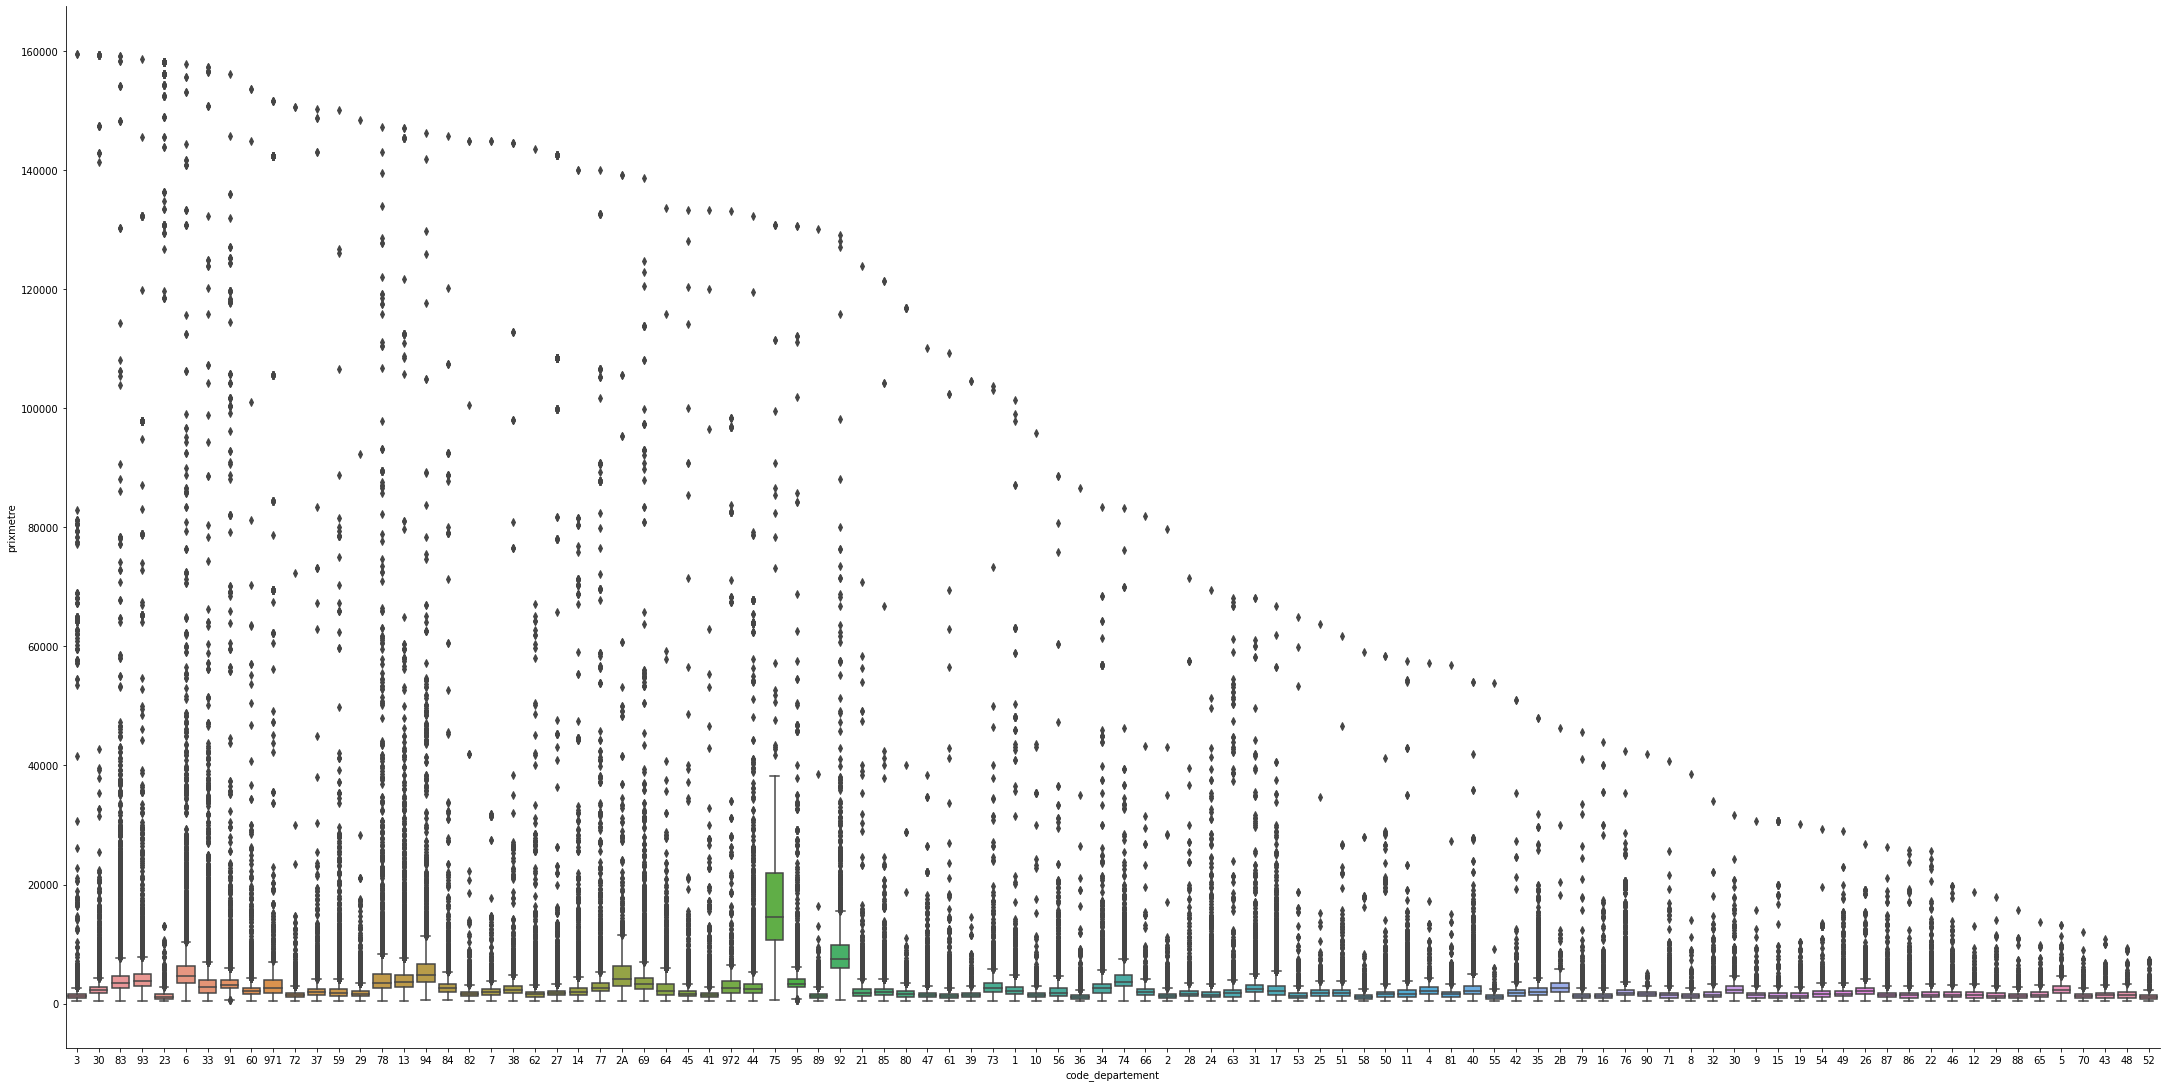

In [ ]:
sns.catplot(x='code_departement', y='prixmetre', data=M_19_int6, kind="box",height=15, aspect=2) #showfliers=False

In [ ]:
Result_M6=outliers(M_19_int6)

In [ ]:
Result_M6.shape

(605162, 41)

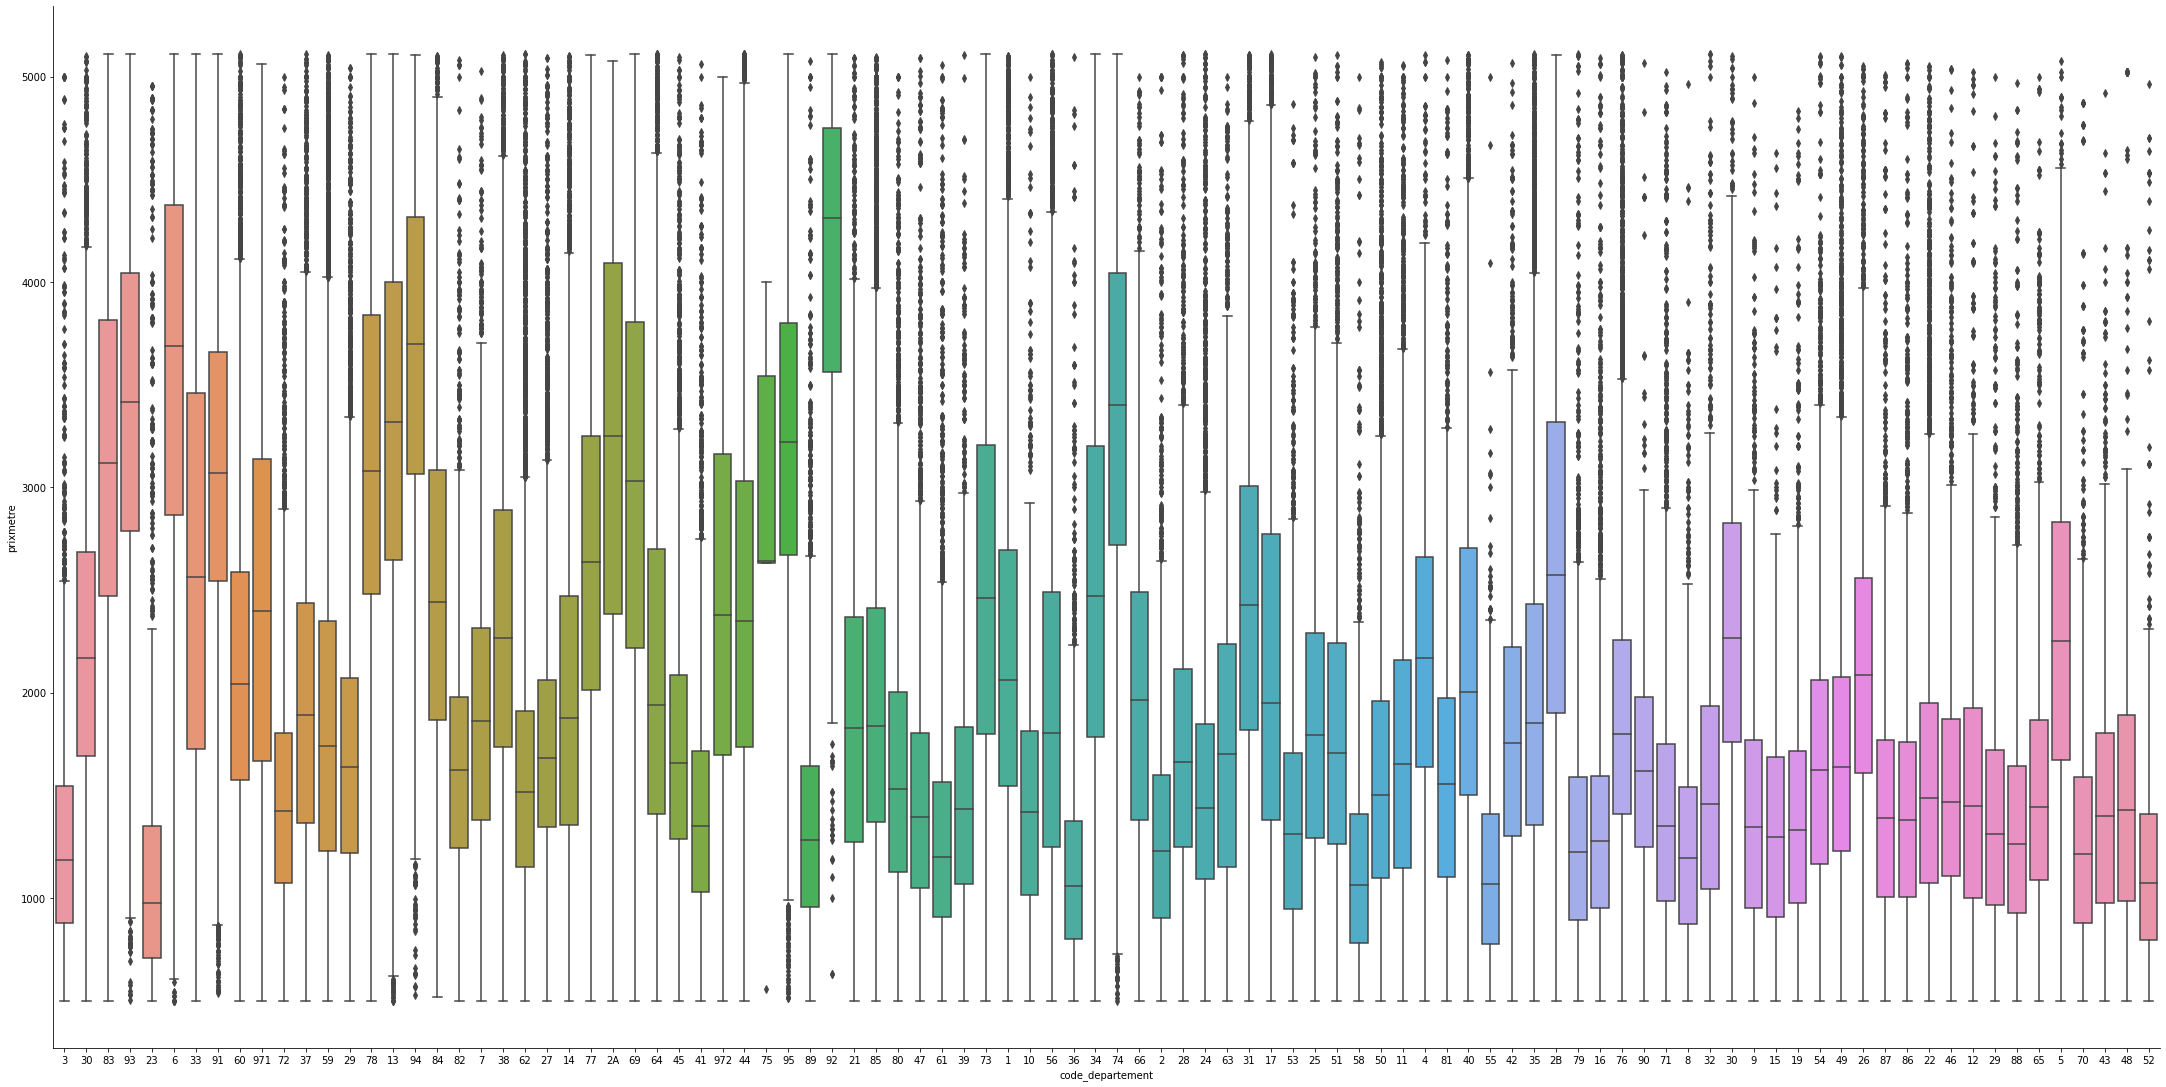

In [ ]:
sns.catplot(x='code_departement', y='prixmetre', data=Result_M6, kind="box",height=15, aspect=2) #showfliers=False

In [ ]:
Result_M7=Result_M6.drop_duplicates(subset=['id_mutation'])

In [ ]:
Result_M7.shape

(493548, 41)

In [ ]:
Result_M8=outliers(Result_M7)

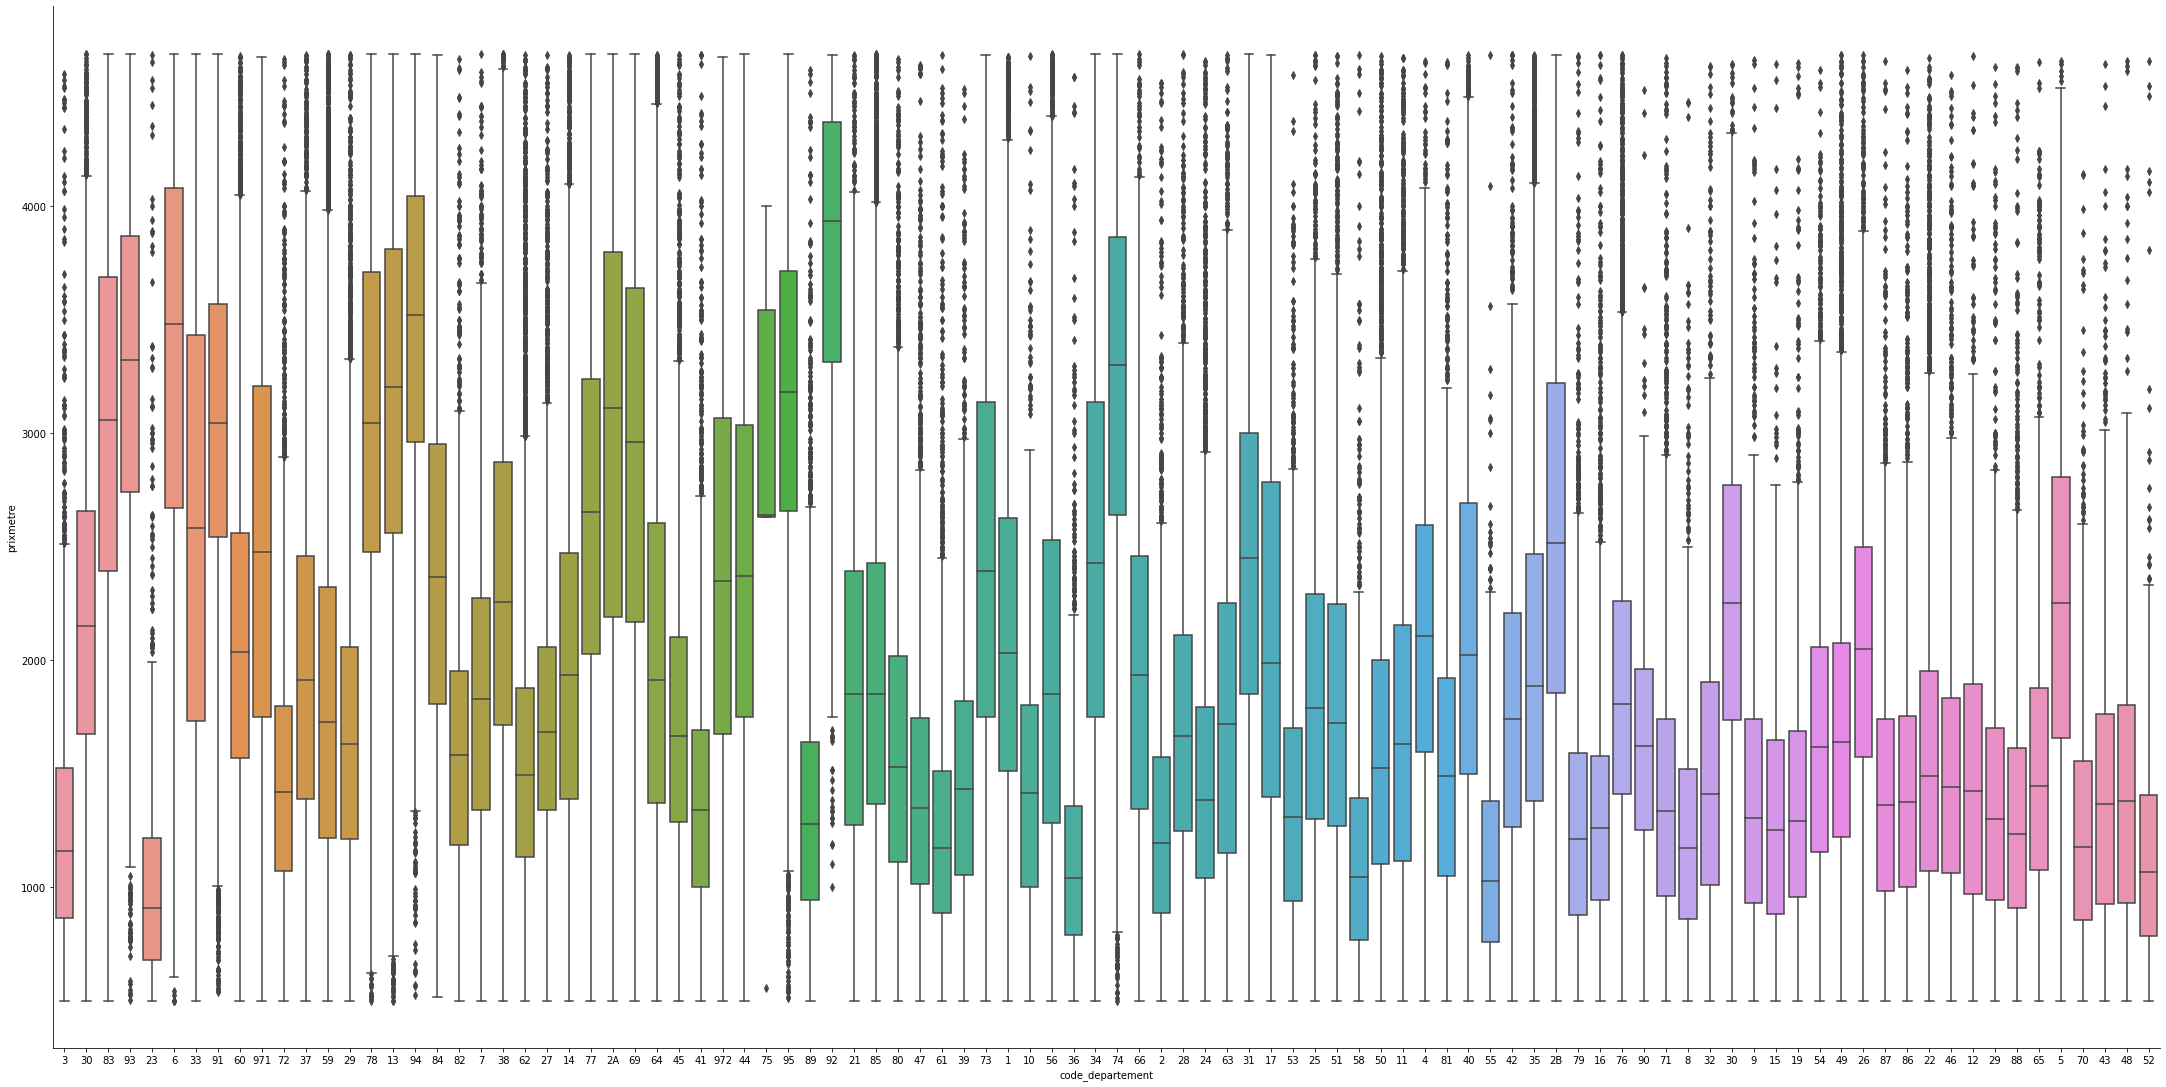

In [ ]:
sns.catplot(x='code_departement', y='prixmetre', data=Result_M8, kind="box",height=15, aspect=2) #showfliers=False

In [ ]:
Result_M9=M_19_int6.drop_duplicates(subset=['id_mutation'])

In [ ]:
Result_M10=outliers(Result_M9)

In [ ]:
Result_M10.shape

(490257, 41)

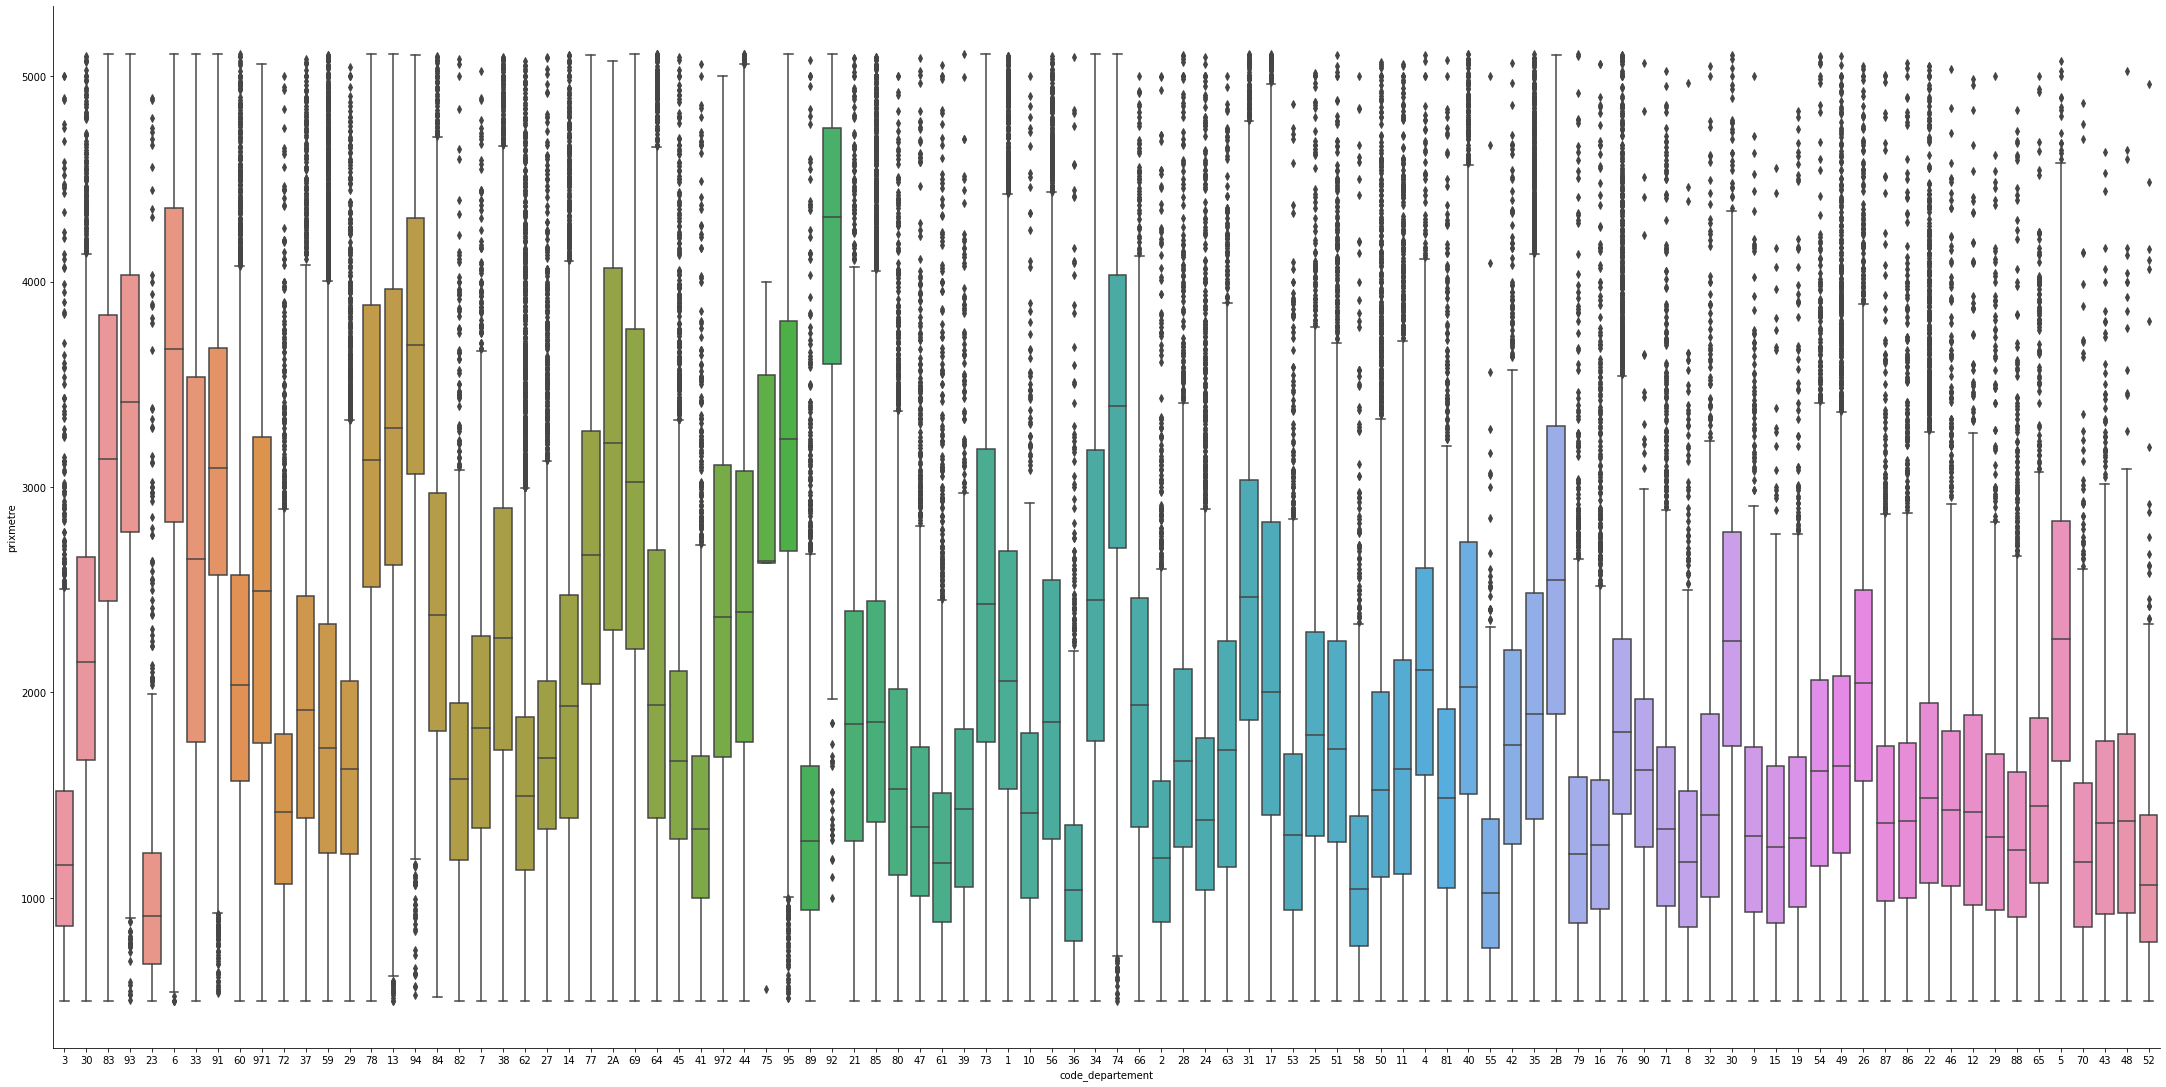

In [ ]:
sns.catplot(x='code_departement', y='prixmetre', data=Result_M10, kind="box",height=15, aspect=2) #showfliers=False

In [ ]:
Q1 = A_19_int6['prixmetre'].quantile(0.25)
Q3 = A_19_int6['prixmetre'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (A_19_int6['prixmetre'] >= Q1 - 1.5 * IQR) & (A_19_int6['prixmetre'] <= Q3 + 1.5 *IQR)
A_19_int_outF=A_19_int6.loc[filter]

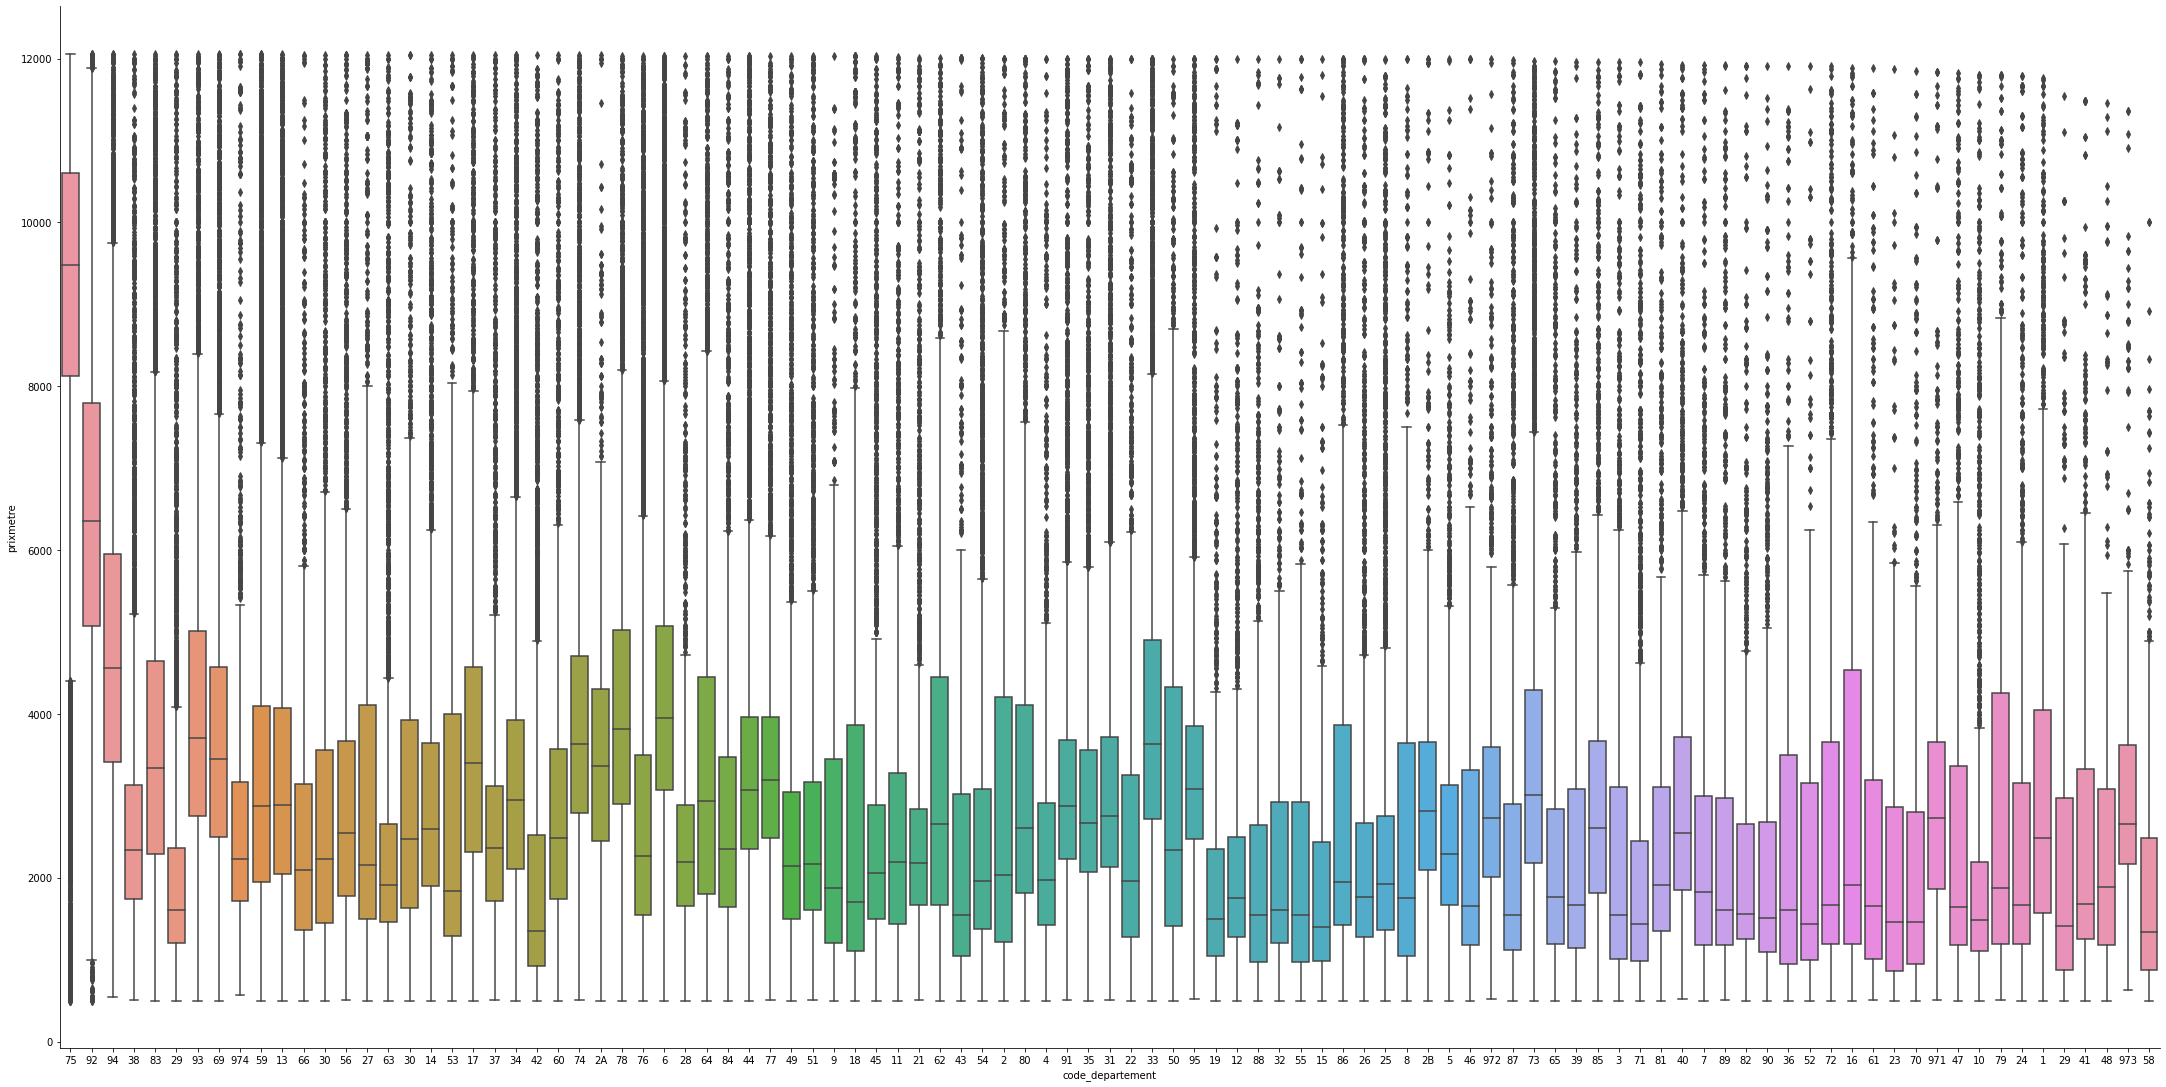

In [ ]:
sns.catplot(x='code_departement', y='prixmetre', data=A_19_int_outF, kind="box",height=15, aspect=2 ) #showfliers=False

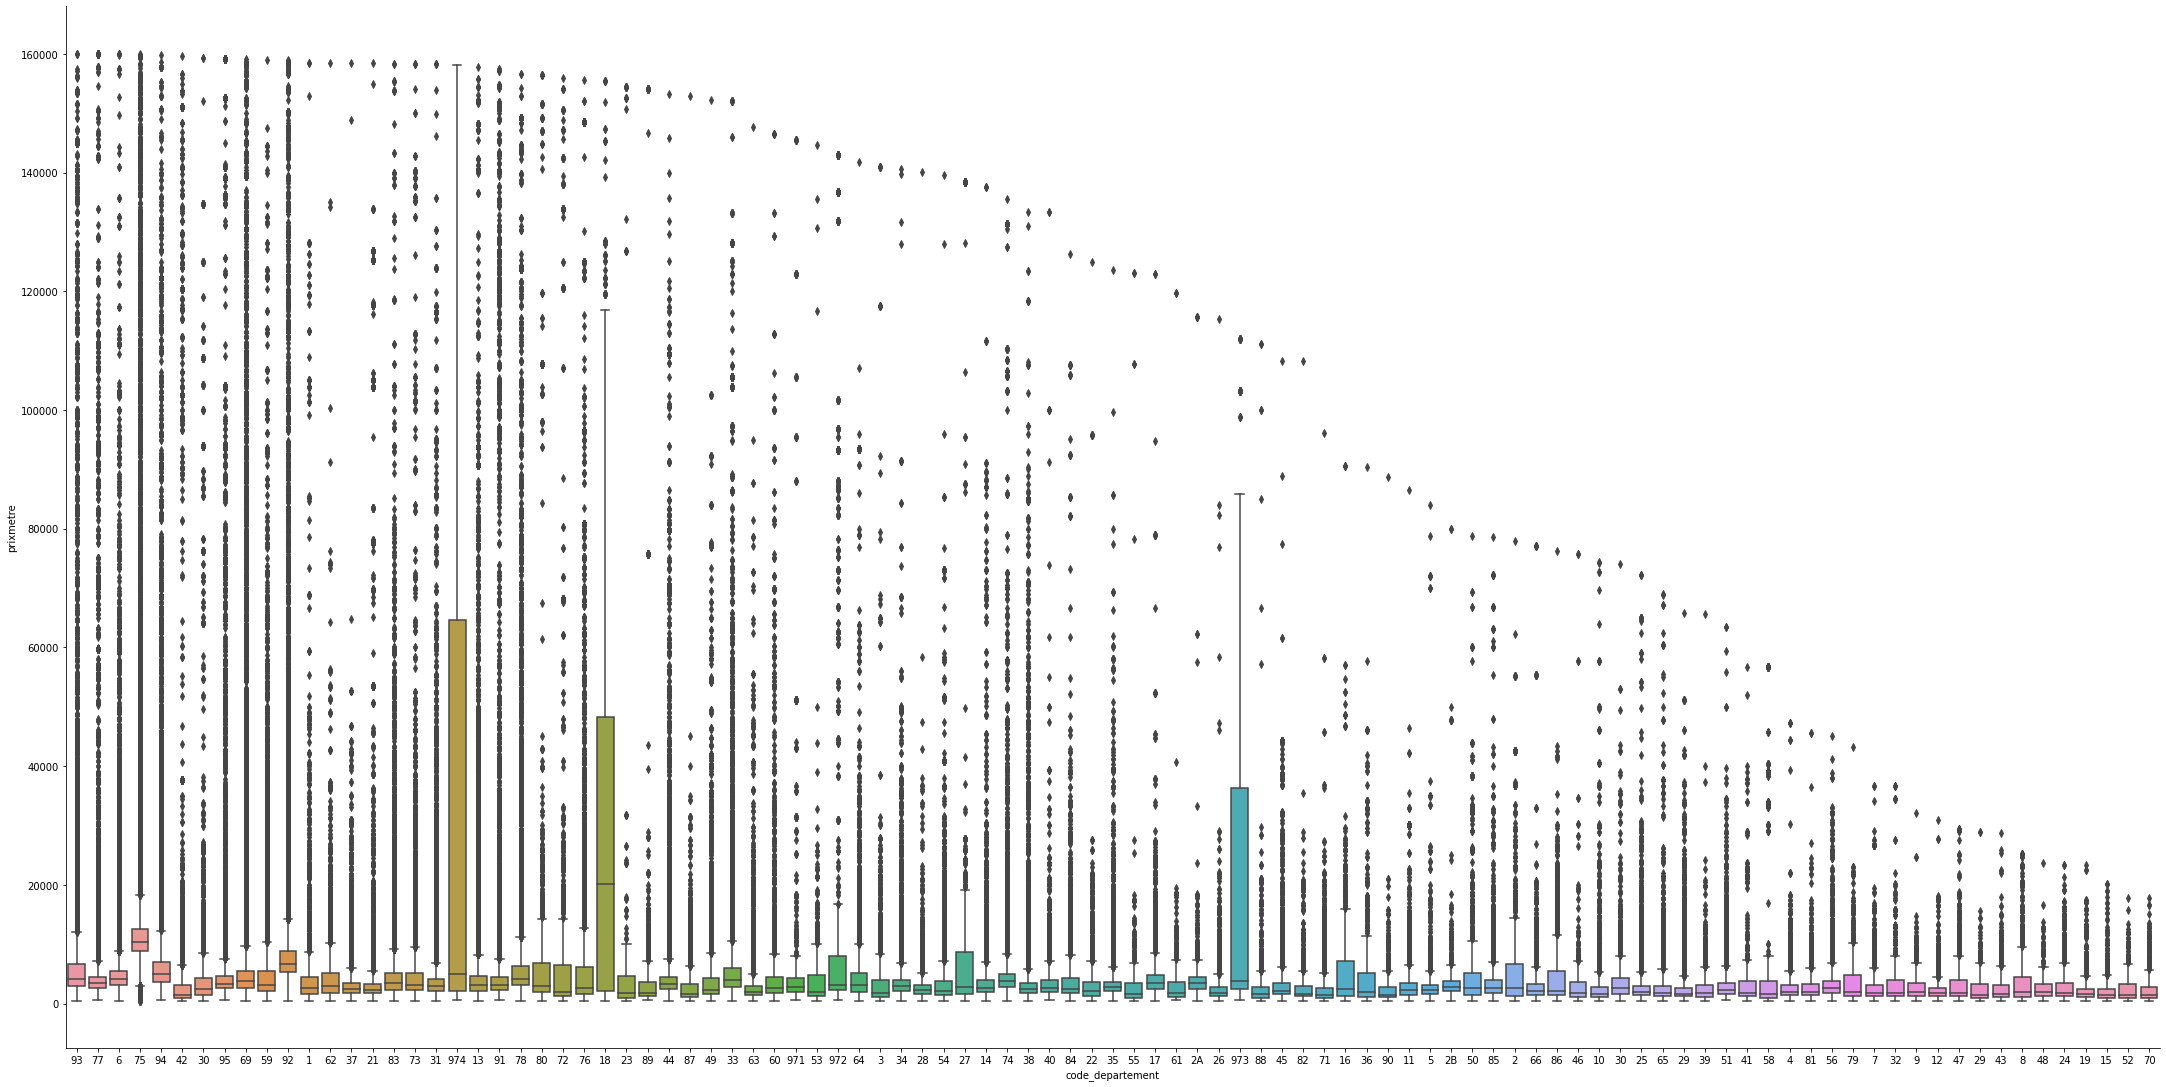

In [ ]:
sns.catplot(x='code_departement', y='prixmetre', data=A_19_int6, kind="box",height=15, aspect=2 )

In [ ]:
Q1 = A_19_int3['prixmetre'].quantile(0.25)
Q3 = A_19_int3['prixmetre'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (A_19_int3['prixmetre'] >= Q1 - 1.5 * IQR) & (A_19_int3['prixmetre'] <= Q3 + 1.5 *IQR)
A_19_int_outF1=A_19_int3.loc[filter]

In [ ]:
A_19_int_outF1[A_19_int_outF1['code_departement']==75].shape

(32965, 41)

In [ ]:
A_19_int_outF1

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,prixmetre
2527431,2019-1052807,2019-02-15,1,Vente,4500.00,20.00,NaN,RUE DU TEMPLE,2130,73100.00,73008,Aix-les-Bains,73,nan,NaN,73008000CD0859,NaN,NaN,1,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,1,2.00,Appartement,25.00,1.00,NaN,NaN,NaN,NaN,nan,5.91,45.69,180.00
2547270,2019-1060416,2019-12-27,1,Vente,4500.00,78.00,NaN,RUE DU NIVOLET,2910,73000.00,73065,Chambéry,73,nan,NaN,73065000CE0127,NaN,NaN,57,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,1,2.00,Appartement,50.00,2.00,NaN,NaN,NaN,NaN,nan,5.91,45.57,90.00
3532787,2019-1514595,2019-11-04,1,Vente,4500.00,14.00,NaN,RUE SAINTE FOY,8561,75002.00,75102,Paris 2e Arrondissement,75,nan,NaN,75102000AP0125,NaN,NaN,174.00,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,1,2.00,Appartement,17.00,1.00,NaN,NaN,NaN,NaN,nan,2.35,48.87,264.71
1288653,2019-531448,2019-04-05,1,Vente,4500.00,70.00,NaN,RUE DE SAINT ENOGAT,1720,35800.00,35093,Dinard,35,nan,NaN,350930000E1064,NaN,NaN,33,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,1,2.00,Appartement,65.00,2.00,NaN,NaN,NaN,NaN,nan,-2.06,48.64,69.23
75941,2019-28389,2019-04-03,1,Vente,4500.00,78.00,NaN,BD DES ETATS UNIS,1130,3200.00,3310,Vichy,3,nan,NaN,03310000AW0219,NaN,NaN,81.00,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,1,2.00,Appartement,18.00,1.00,NaN,NaN,NaN,NaN,nan,3.42,46.12,250.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3504770,2019-1495335,2019-02-11,1,Vente,4950000.00,87.00,NaN,AV KLEBER,5159,75016.00,75116,Paris 16e Arrondissement,75,nan,NaN,75116000FR0019,NaN,NaN,129,15.76,130,468.86,NaN,nan,nan,nan,nan,nan,2,2.00,Appartement,419.00,10.00,NaN,NaN,NaN,NaN,nan,2.29,48.86,11813.84
3508040,2019-1497562,2019-07-30,1,Vente,5096154.00,8.00,B,RUE DE PRESBOURG,7798,75016.00,75116,Paris 16e Arrondissement,75,nan,NaN,75116000FG0027,NaN,NaN,201,385.00,217.00,nan,NaN,nan,nan,nan,nan,nan,2,2.00,Appartement,367.00,11.00,NaN,NaN,NaN,NaN,nan,2.29,48.87,13885.98
3300178,2019-1389443,2019-12-16,1,Vente,5515000.00,2.00,NaN,RUE CATULIENNE,1432,93200.00,93066,Saint-Denis,93,nan,NaN,93066000AI0122,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,0,2.00,Appartement,523.00,9.00,S,sols,NaN,NaN,5293.00,2.35,48.94,10544.93
3506142,2019-1496273,2019-04-26,1,Vente,5805950.00,15.00,NaN,AV PDT WILSON,7804,75016.00,75116,Paris 16e Arrondissement,75,nan,NaN,75116000FQ0018,NaN,NaN,222,441.14,227,9.38,292.00,nan,295.00,nan,308.00,nan,5,2.00,Appartement,466.00,9.00,NaN,NaN,NaN,NaN,nan,2.30,48.86,12459.12


In [ ]:
def outliers(dataF):
    dataF_outliers=pd.DataFrame()
    for i in dataF['code_departement'].unique():
      DATAF= dataF[dataF['code_departement']==i]
      Q1 = DATAF['prixmetre'].quantile(0.25)
      Q3 = DATAF['prixmetre'].quantile(0.75)
      IQR = Q3 - Q1    #IQR is interquartile range. 
      filter = (DATAF['prixmetre'] >= Q1 - 1.5 * IQR) & (DATAF['prixmetre'] <= Q3 + 1.5 *IQR)
      filtered =DATAF.loc[filter] 
      
      dataF_outliers = pd.concat([dataF_outliers, filtered], axis=0)

    return dataF_outliers


In [ ]:
outliers(A_19_int3.head(100))

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,prixmetre
2527431,2019-1052807,2019-02-15,1,Vente,4500.00,20.00,NaN,RUE DU TEMPLE,2130,73100.00,73008,Aix-les-Bains,73,nan,NaN,73008000CD0859,NaN,NaN,1,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,1,2.00,Appartement,25.00,1.00,NaN,NaN,NaN,NaN,nan,5.91,45.69,180.00
2547270,2019-1060416,2019-12-27,1,Vente,4500.00,78.00,NaN,RUE DU NIVOLET,2910,73000.00,73065,Chambéry,73,nan,NaN,73065000CE0127,NaN,NaN,57,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,1,2.00,Appartement,50.00,2.00,NaN,NaN,NaN,NaN,nan,5.91,45.57,90.00
2514706,2019-1046927,2019-04-01,1,Vente,5000.00,5023.00,NaN,COURS D EN BAS,B024,73260.00,73003,Grand-Aigueblanche,73,73045.00,Le Bois,730030450A0491,730450000A0491,NaN,2,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,1,2.00,Appartement,14.00,1.00,NaN,NaN,NaN,NaN,nan,6.50,45.50,357.14
2521766,2019-1050149,2019-06-07,1,Vente,5000.00,5617.00,NaN,IMM RESIDENCE 1650,A275,73120.00,73227,Courchevel,73,nan,NaN,73227000AH0413,NaN,NaN,276,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,1,2.00,Appartement,51.00,2.00,NaN,NaN,NaN,NaN,nan,6.65,45.42,98.04
3532787,2019-1514595,2019-11-04,1,Vente,4500.00,14.00,NaN,RUE SAINTE FOY,8561,75002.00,75102,Paris 2e Arrondissement,75,nan,NaN,75102000AP0125,NaN,NaN,174.00,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,1,2.00,Appartement,17.00,1.00,NaN,NaN,NaN,NaN,nan,2.35,48.87,264.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3431889,2019-1453153,2019-09-24,1,Vente,5000.00,200.00,NaN,RUE AMEDEE FENGAROL,0020,97130.00,97107,Capesterre-Belle-Eau,971,nan,NaN,97107000AP0319,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,0,2.00,Appartement,40.00,4.00,S,sols,NaN,NaN,137.00,-61.56,16.05,125.00
3431888,2019-1453153,2019-09-24,1,Vente,5000.00,200.00,NaN,RUE AMEDEE FENGAROL,0020,97130.00,97107,Capesterre-Belle-Eau,971,nan,NaN,97107000AP0319,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,0,2.00,Appartement,40.00,4.00,S,sols,NaN,NaN,137.00,-61.56,16.05,125.00
110990,2019-42084,2019-09-09,1,Vente,5000.00,9001.00,NaN,AV DU GEN BARBOT,0361,5100.00,5023,Briançon,5,nan,NaN,05023000AM0167,NaN,NaN,87.00,69.00,88.00,nan,NaN,nan,nan,nan,nan,nan,2,2.00,Appartement,69.00,4.00,NaN,NaN,NaN,NaN,nan,6.63,44.90,72.46
878632,2019-349221,2019-11-07,1,Vente,5000.00,15.00,NaN,RUE DOCTEUR THIELMANS,1365,29200.00,29019,Brest,29,nan,NaN,29019000KS0097,NaN,NaN,9.00,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,1,2.00,Appartement,40.00,2.00,NaN,NaN,NaN,NaN,nan,-4.50,48.38,125.00


In [ ]:
Res=outliers(A_19_int3)

In [ ]:
Res.shape

(520623, 41)

In [ ]:
Res[Res['code_departement']==75].shape

(34771, 41)

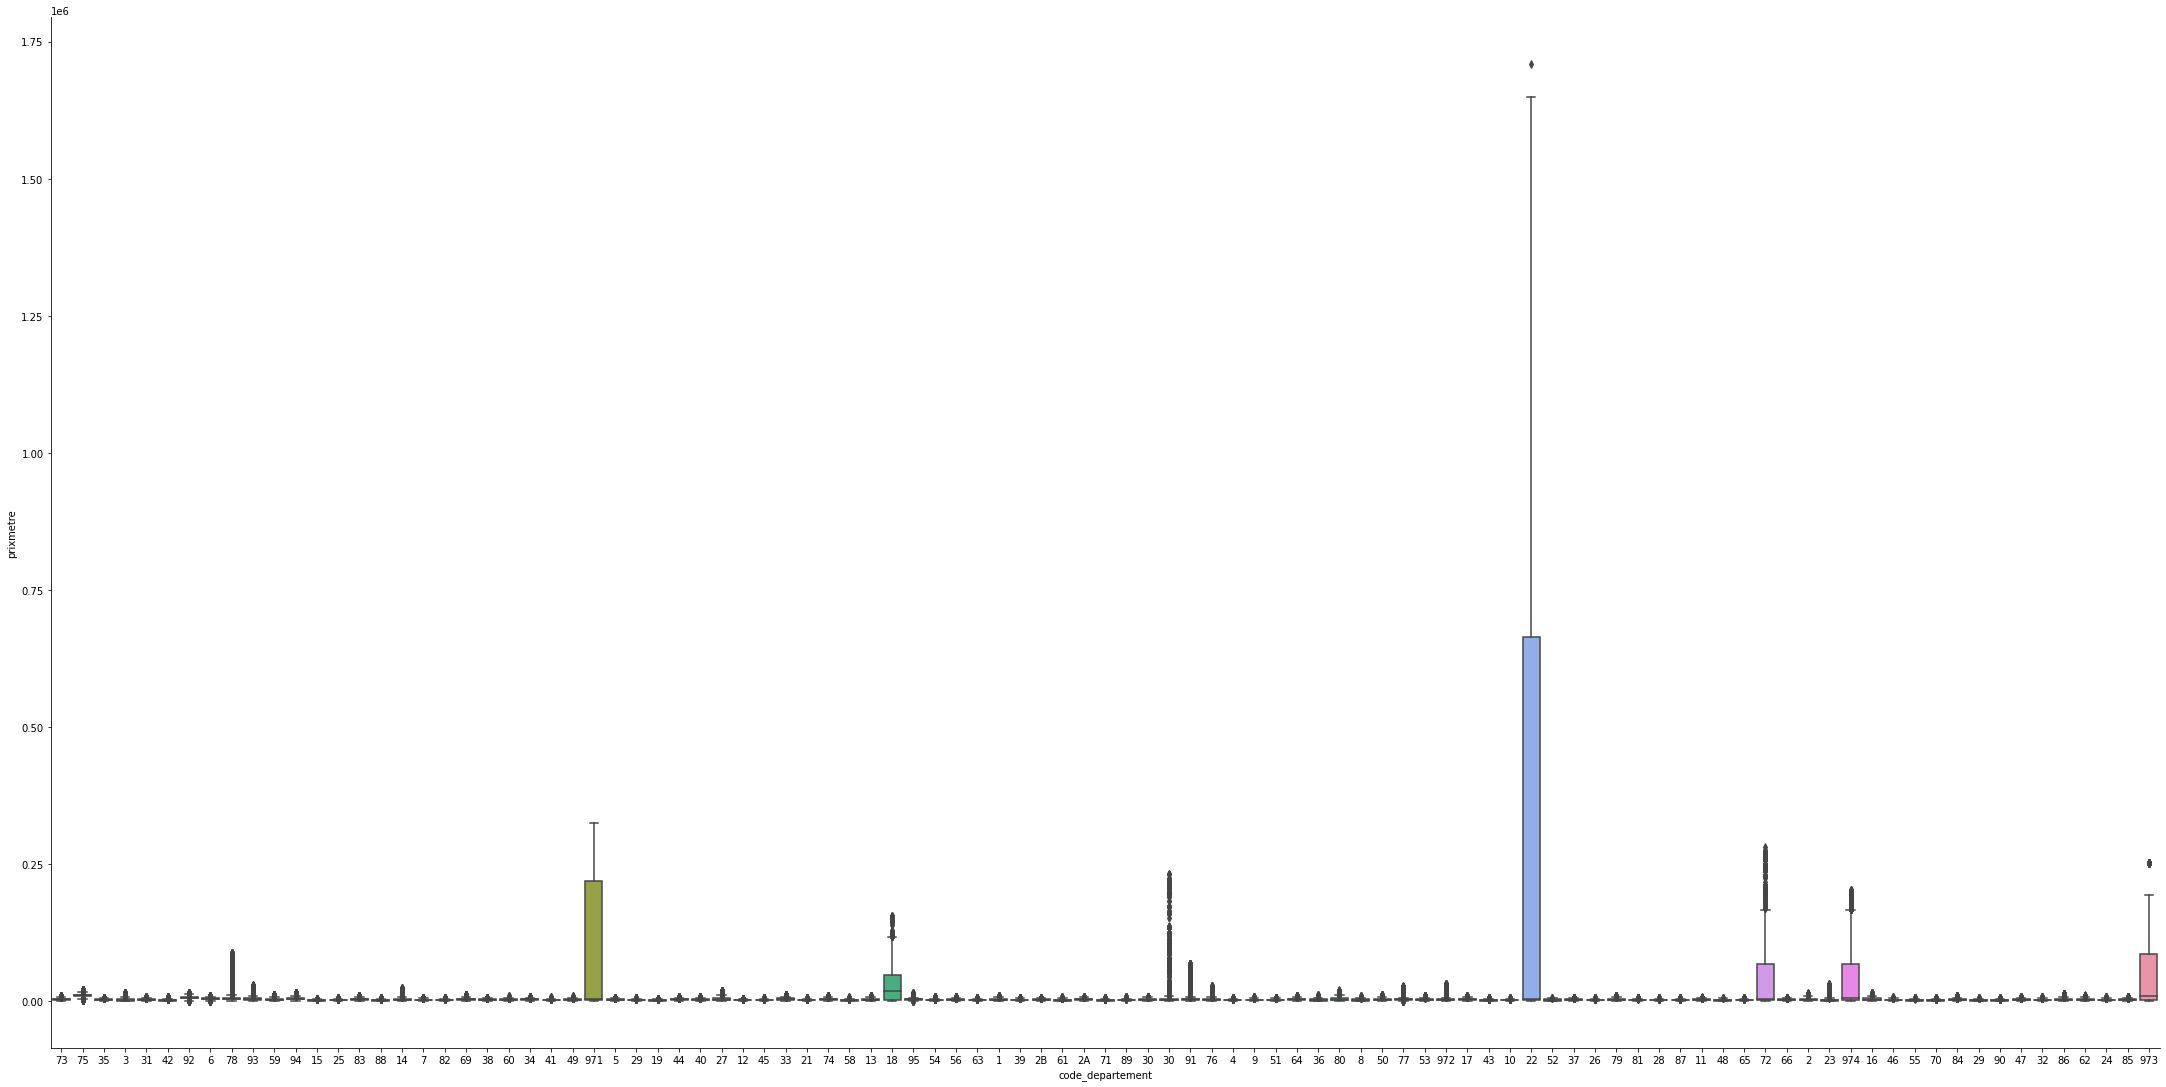

In [ ]:
sns.catplot(x='code_departement', y='prixmetre', data=Res, kind="box",height=15, aspect=2 )

In [ ]:
Res2=outliers(A_19_int6)

In [ ]:
Res2.shape

(500308, 41)

In [ ]:
Res2[Res2['code_departement']==974].shape

(4387, 41)

In [ ]:
Res2[Res2['code_departement']==31].shape

(13904, 41)

In [ ]:
Res2[Res2['code_departement']==27].shape

(2049, 41)

In [ ]:
AA=Res2.loc[(Res2['id_mutation'] == '2019-1111475')]

In [ ]:
AA

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,prixmetre


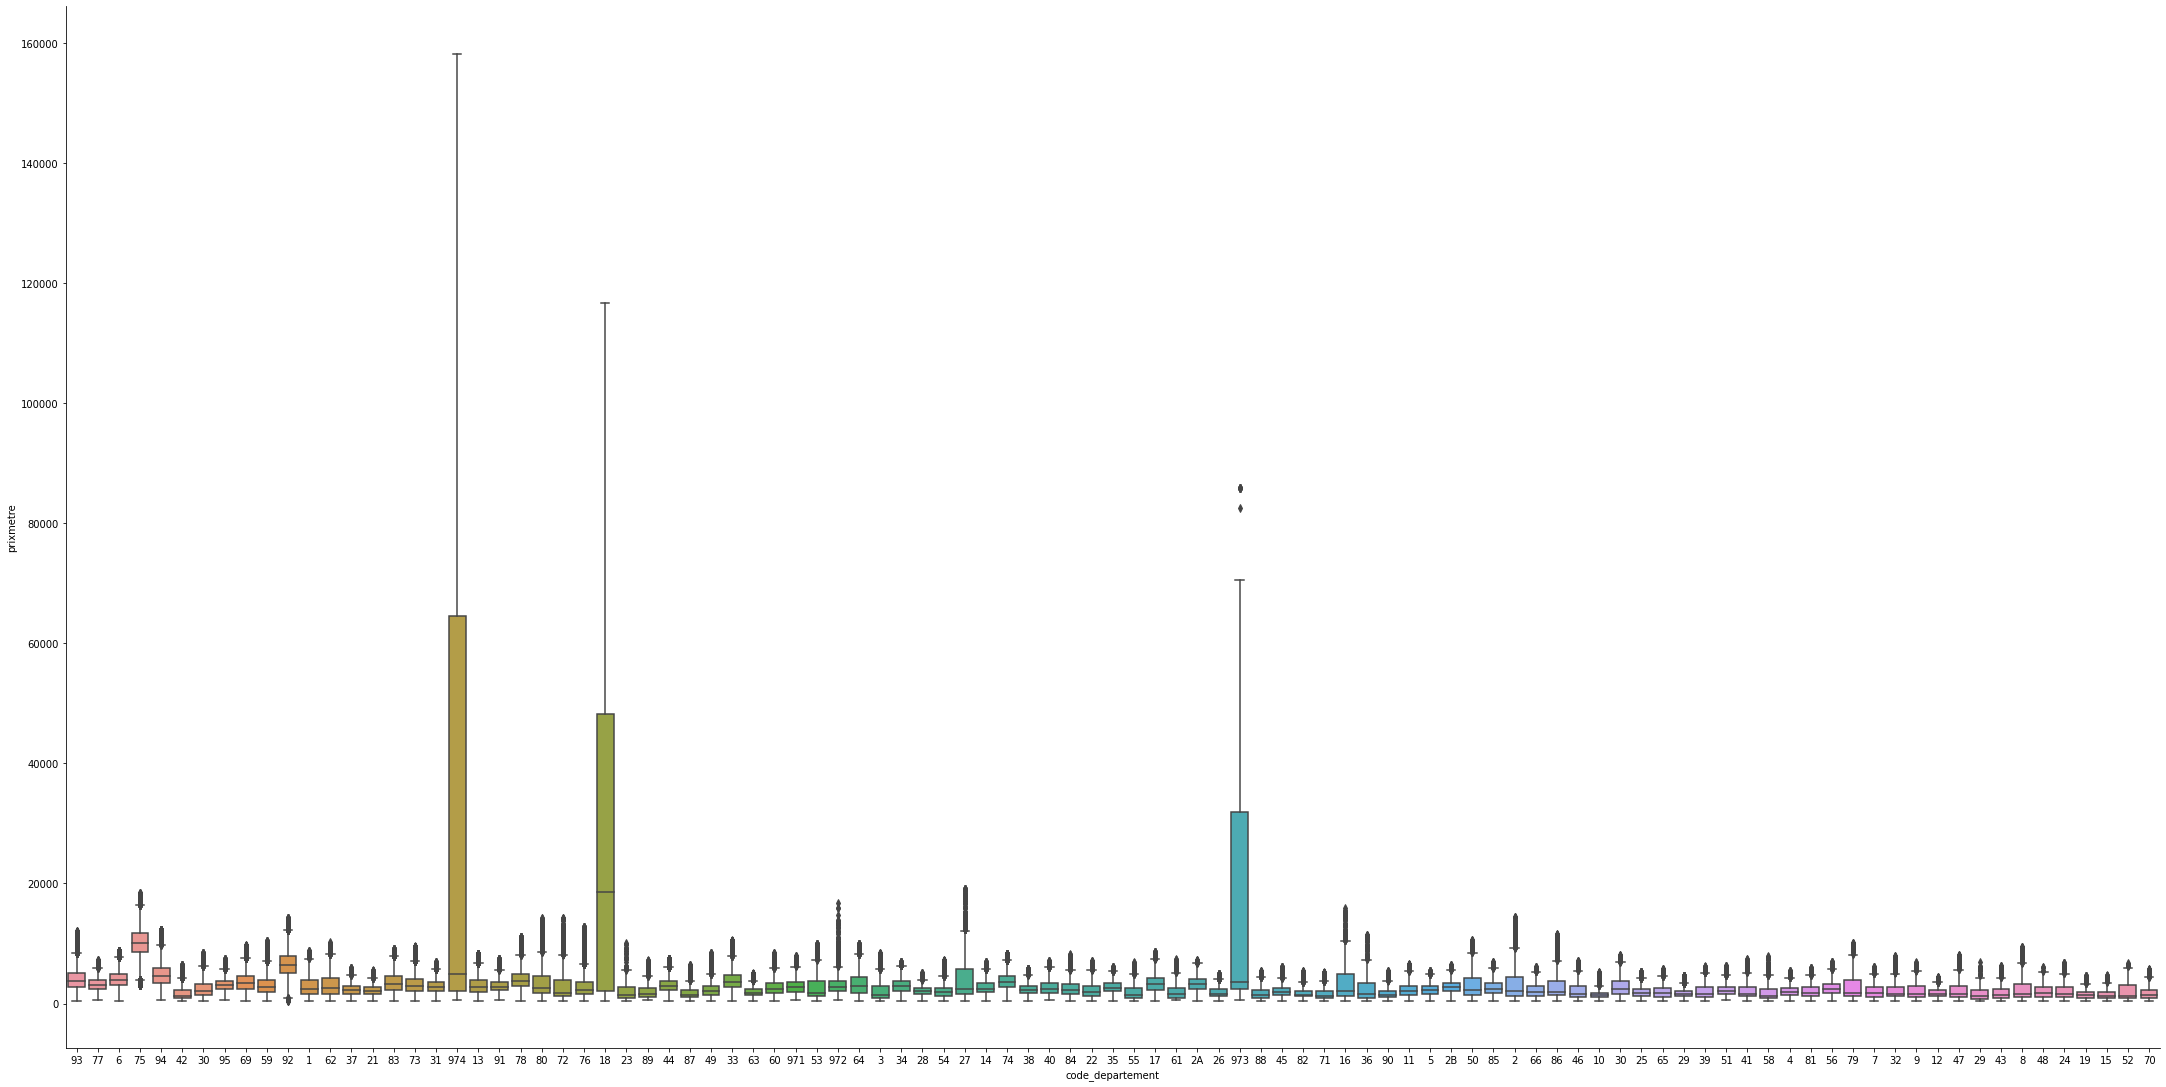

In [ ]:
sns.catplot(x='code_departement', y='prixmetre', data=Res2, kind="box",height=15, aspect=2 )

In [ ]:
# Res2_1 = Res2.sort_values(by = ['code_departement'])

In [ ]:
def outliers(dataF):
    dataF_outliers=pd.DataFrame()
    for i in dataF['code_departement'].unique():
      Q1 = dataF['prixmetre'].quantile(0.25)
      Q3 = dataF['prixmetre'].quantile(0.75)
      IQR = Q3 - Q1    #IQR is interquartile range. 
      filter = (dataF['prixmetre'] >= Q1 - 1.5 * IQR) & (dataF['prixmetre'] <= Q3 + 1.5 *IQR)
      # dataF.apply(lambda x: for x.code_departement in dataF)
      Data_filter=dataF[dataF['code_departement']==i].loc[filter]
      dataF_outliers = pd.concat([dataF_outliers, Data_filter], axis=0)
    return dataF_outliers

In [ ]:
TestF_out1=outliers(A_19_int3)

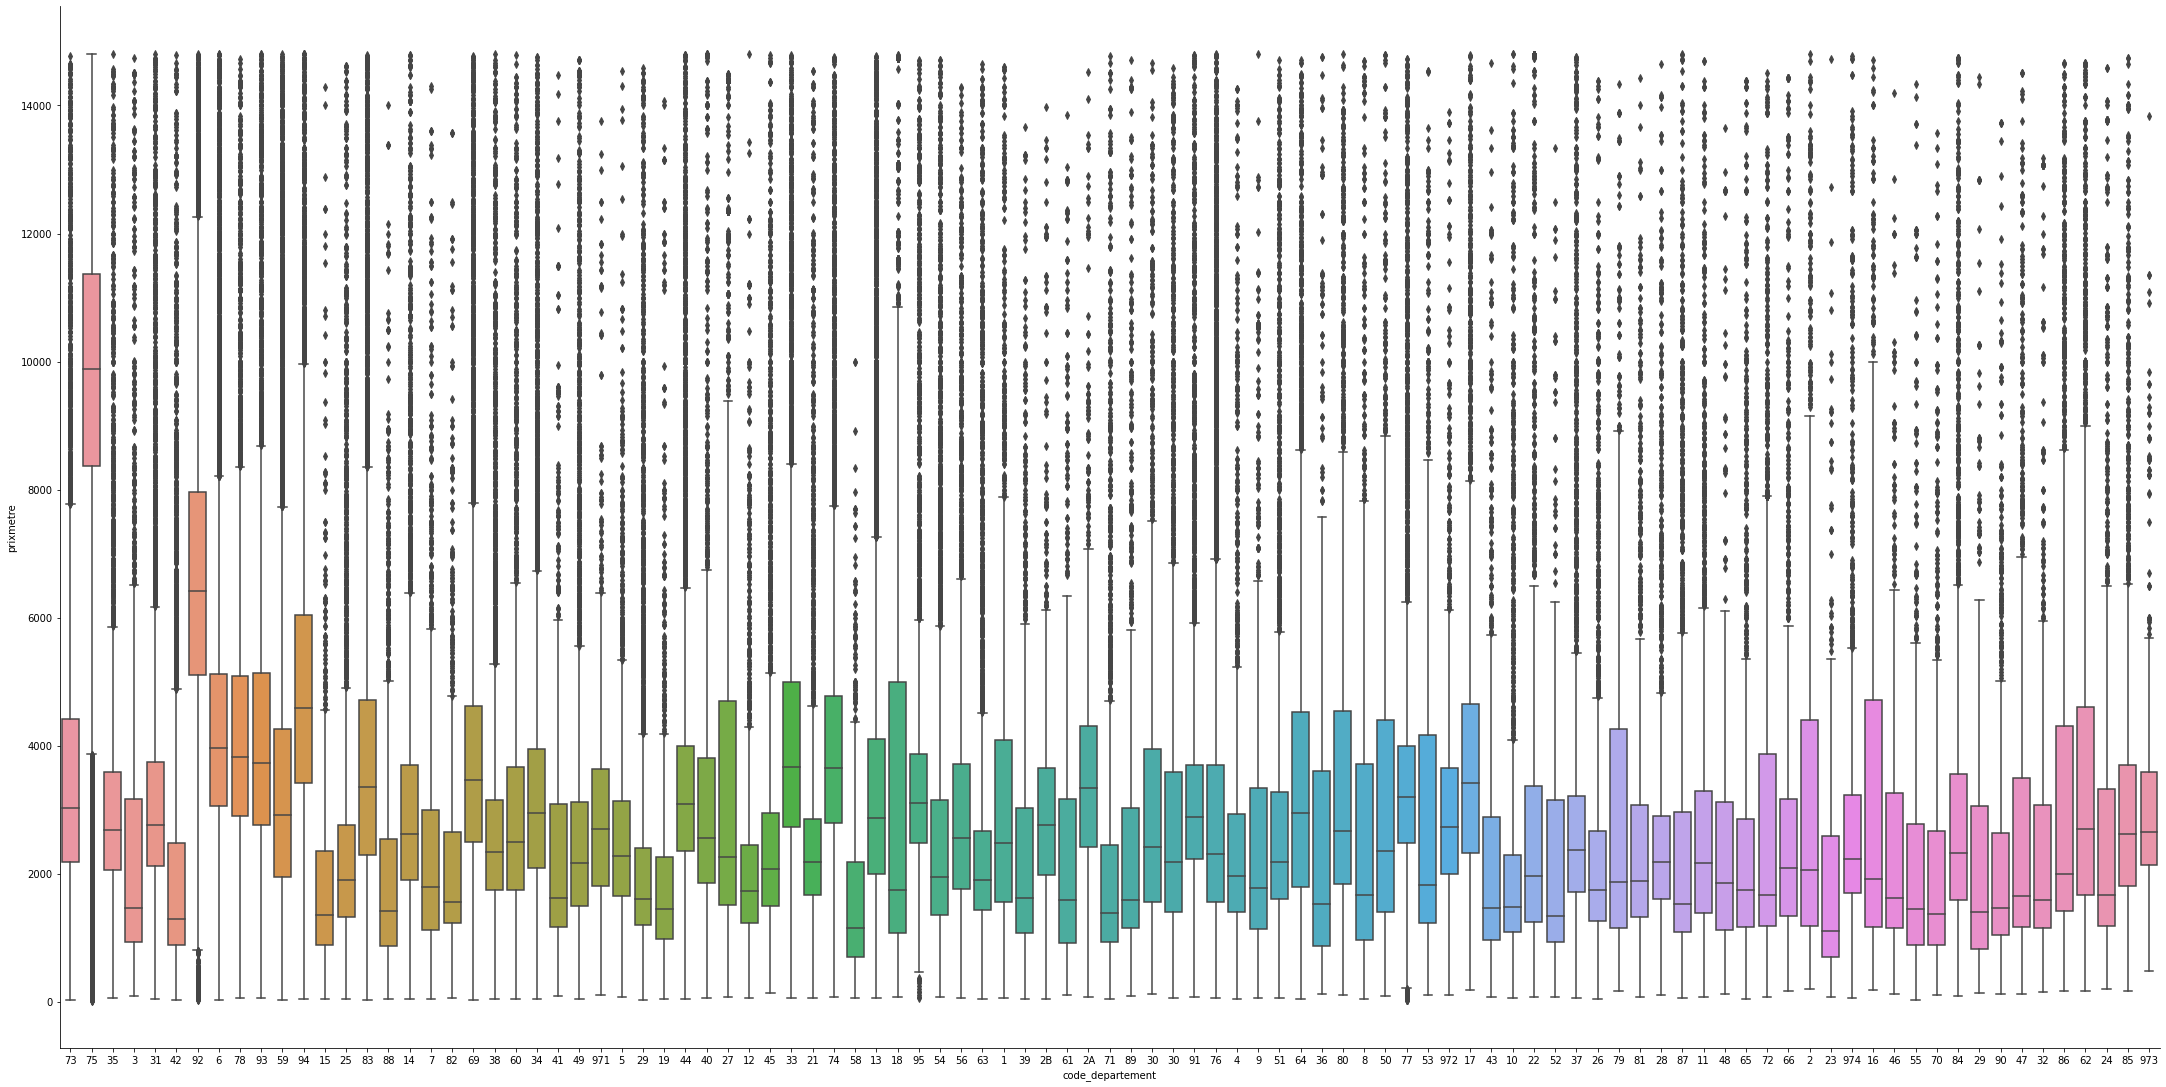

In [ ]:
sns.catplot(x='code_departement', y='prixmetre', data=TestF_out1, kind="box",height=15, aspect=2 )

In [ ]:
TestF_out1

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,prixmetre
2527431,2019-1052807,2019-02-15,1,Vente,4500.00,20.00,NaN,RUE DU TEMPLE,2130,73100.00,73008,Aix-les-Bains,73,nan,NaN,73008000CD0859,NaN,NaN,1,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,1,2.00,Appartement,25.00,1.00,NaN,NaN,NaN,NaN,nan,5.91,45.69,180.00
2547270,2019-1060416,2019-12-27,1,Vente,4500.00,78.00,NaN,RUE DU NIVOLET,2910,73000.00,73065,Chambéry,73,nan,NaN,73065000CE0127,NaN,NaN,57,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,1,2.00,Appartement,50.00,2.00,NaN,NaN,NaN,NaN,nan,5.91,45.57,90.00
2514706,2019-1046927,2019-04-01,1,Vente,5000.00,5023.00,NaN,COURS D EN BAS,B024,73260.00,73003,Grand-Aigueblanche,73,73045.00,Le Bois,730030450A0491,730450000A0491,NaN,2,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,1,2.00,Appartement,14.00,1.00,NaN,NaN,NaN,NaN,nan,6.50,45.50,357.14
2521766,2019-1050149,2019-06-07,1,Vente,5000.00,5617.00,NaN,IMM RESIDENCE 1650,A275,73120.00,73227,Courchevel,73,nan,NaN,73227000AH0413,NaN,NaN,276,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,1,2.00,Appartement,51.00,2.00,NaN,NaN,NaN,NaN,nan,6.65,45.42,98.04
2516646,2019-1047789,2019-04-18,2,Echange,5000.00,132.00,NaN,RUE GRANDE RUE,0680,73600.00,73181,Moûtiers,73,nan,NaN,731810000A0216,NaN,NaN,3,nan,4,nan,6.00,nan,7.00,nan,nan,nan,4,2.00,Appartement,160.00,5.00,NaN,NaN,NaN,NaN,nan,6.53,45.48,31.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447396,2019-1460677,2019-12-23,1,Vente,755598.40,55.00,NaN,RUE CLAUDE ROUGET DE L ISLE,0890,97300.00,97302,Cayenne,973,nan,NaN,97302000AI0212,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,0,2.00,Appartement,86.00,3.00,S,sols,NaN,NaN,359.00,-52.33,4.94,8786.03
3445048,2019-1459479,2019-04-17,1,Vente,850000.00,5850.00,NaN,RTE DES PLAGES,0233,97354.00,97309,Remire-Montjoly,973,nan,NaN,97309000AP0391,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,0,2.00,Appartement,150.00,3.00,S,sols,NaN,NaN,1000.00,-52.25,4.87,5666.67
3445049,2019-1459479,2019-04-17,1,Vente,850000.00,5850.00,NaN,RTE DES PLAGES,0233,97354.00,97309,Remire-Montjoly,973,nan,NaN,97309000AP0391,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,0,2.00,Appartement,150.00,3.00,L,landes,NaN,NaN,4310.00,-52.25,4.87,5666.67
3445051,2019-1459479,2019-04-17,1,Vente,850000.00,5850.00,NaN,RTE DES PLAGES,0233,97354.00,97309,Remire-Montjoly,973,nan,NaN,97309000AP0391,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,0,2.00,Appartement,131.00,4.00,L,landes,NaN,NaN,4310.00,-52.25,4.87,6488.55


In [ ]:
TestF_out1.shape

(525612, 41)

In [ ]:
TestF_out1[TestF_out1['code_departement']==75].shape

(32965, 41)

In [ ]:
A3=TestF_out1.loc[(TestF_out['id_mutation'] == '2019-1111475')]

In [ ]:
A3

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,prixmetre


In [ ]:
TestF_out

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,prixmetre
2527431,2019-1052807,2019-02-15,1,Vente,4500.00,20.00,NaN,RUE DU TEMPLE,2130,73100.00,73008,Aix-les-Bains,73,nan,NaN,73008000CD0859,NaN,NaN,1,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,1,2.00,Appartement,25.00,1.00,NaN,NaN,NaN,NaN,nan,5.91,45.69,180.00
2547270,2019-1060416,2019-12-27,1,Vente,4500.00,78.00,NaN,RUE DU NIVOLET,2910,73000.00,73065,Chambéry,73,nan,NaN,73065000CE0127,NaN,NaN,57,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,1,2.00,Appartement,50.00,2.00,NaN,NaN,NaN,NaN,nan,5.91,45.57,90.00
2514706,2019-1046927,2019-04-01,1,Vente,5000.00,5023.00,NaN,COURS D EN BAS,B024,73260.00,73003,Grand-Aigueblanche,73,73045.00,Le Bois,730030450A0491,730450000A0491,NaN,2,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,1,2.00,Appartement,14.00,1.00,NaN,NaN,NaN,NaN,nan,6.50,45.50,357.14
2521766,2019-1050149,2019-06-07,1,Vente,5000.00,5617.00,NaN,IMM RESIDENCE 1650,A275,73120.00,73227,Courchevel,73,nan,NaN,73227000AH0413,NaN,NaN,276,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,1,2.00,Appartement,51.00,2.00,NaN,NaN,NaN,NaN,nan,6.65,45.42,98.04
2516646,2019-1047789,2019-04-18,2,Echange,5000.00,132.00,NaN,RUE GRANDE RUE,0680,73600.00,73181,Moûtiers,73,nan,NaN,731810000A0216,NaN,NaN,3,nan,4,nan,6.00,nan,7.00,nan,nan,nan,4,2.00,Appartement,160.00,5.00,NaN,NaN,NaN,NaN,nan,6.53,45.48,31.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447396,2019-1460677,2019-12-23,1,Vente,755598.40,55.00,NaN,RUE CLAUDE ROUGET DE L ISLE,0890,97300.00,97302,Cayenne,973,nan,NaN,97302000AI0212,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,0,2.00,Appartement,86.00,3.00,S,sols,NaN,NaN,359.00,-52.33,4.94,8786.03
3445048,2019-1459479,2019-04-17,1,Vente,850000.00,5850.00,NaN,RTE DES PLAGES,0233,97354.00,97309,Remire-Montjoly,973,nan,NaN,97309000AP0391,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,0,2.00,Appartement,150.00,3.00,S,sols,NaN,NaN,1000.00,-52.25,4.87,5666.67
3445049,2019-1459479,2019-04-17,1,Vente,850000.00,5850.00,NaN,RTE DES PLAGES,0233,97354.00,97309,Remire-Montjoly,973,nan,NaN,97309000AP0391,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,0,2.00,Appartement,150.00,3.00,L,landes,NaN,NaN,4310.00,-52.25,4.87,5666.67
3445051,2019-1459479,2019-04-17,1,Vente,850000.00,5850.00,NaN,RTE DES PLAGES,0233,97354.00,97309,Remire-Montjoly,973,nan,NaN,97309000AP0391,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,0,2.00,Appartement,131.00,4.00,L,landes,NaN,NaN,4310.00,-52.25,4.87,6488.55


In [ ]:
TestF_out

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,prixmetre
2527431,2019-1052807,2019-02-15,1,Vente,4500.00,20.00,NaN,RUE DU TEMPLE,2130,73100.00,73008,Aix-les-Bains,73,nan,NaN,73008000CD0859,NaN,NaN,1,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,1,2.00,Appartement,25.00,1.00,NaN,NaN,NaN,NaN,nan,5.91,45.69,180.00
2547270,2019-1060416,2019-12-27,1,Vente,4500.00,78.00,NaN,RUE DU NIVOLET,2910,73000.00,73065,Chambéry,73,nan,NaN,73065000CE0127,NaN,NaN,57,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,1,2.00,Appartement,50.00,2.00,NaN,NaN,NaN,NaN,nan,5.91,45.57,90.00
3532787,2019-1514595,2019-11-04,1,Vente,4500.00,14.00,NaN,RUE SAINTE FOY,8561,75002.00,75102,Paris 2e Arrondissement,75,nan,NaN,75102000AP0125,NaN,NaN,174.00,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,1,2.00,Appartement,17.00,1.00,NaN,NaN,NaN,NaN,nan,2.35,48.87,264.71
1288653,2019-531448,2019-04-05,1,Vente,4500.00,70.00,NaN,RUE DE SAINT ENOGAT,1720,35800.00,35093,Dinard,35,nan,NaN,350930000E1064,NaN,NaN,33,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,1,2.00,Appartement,65.00,2.00,NaN,NaN,NaN,NaN,nan,-2.06,48.64,69.23
75941,2019-28389,2019-04-03,1,Vente,4500.00,78.00,NaN,BD DES ETATS UNIS,1130,3200.00,3310,Vichy,3,nan,NaN,03310000AW0219,NaN,NaN,81.00,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,1,2.00,Appartement,18.00,1.00,NaN,NaN,NaN,NaN,nan,3.42,46.12,250.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3504770,2019-1495335,2019-02-11,1,Vente,4950000.00,87.00,NaN,AV KLEBER,5159,75016.00,75116,Paris 16e Arrondissement,75,nan,NaN,75116000FR0019,NaN,NaN,129,15.76,130,468.86,NaN,nan,nan,nan,nan,nan,2,2.00,Appartement,419.00,10.00,NaN,NaN,NaN,NaN,nan,2.29,48.86,11813.84
3508040,2019-1497562,2019-07-30,1,Vente,5096154.00,8.00,B,RUE DE PRESBOURG,7798,75016.00,75116,Paris 16e Arrondissement,75,nan,NaN,75116000FG0027,NaN,NaN,201,385.00,217.00,nan,NaN,nan,nan,nan,nan,nan,2,2.00,Appartement,367.00,11.00,NaN,NaN,NaN,NaN,nan,2.29,48.87,13885.98
3300178,2019-1389443,2019-12-16,1,Vente,5515000.00,2.00,NaN,RUE CATULIENNE,1432,93200.00,93066,Saint-Denis,93,nan,NaN,93066000AI0122,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,0,2.00,Appartement,523.00,9.00,S,sols,NaN,NaN,5293.00,2.35,48.94,10544.93
3506142,2019-1496273,2019-04-26,1,Vente,5805950.00,15.00,NaN,AV PDT WILSON,7804,75016.00,75116,Paris 16e Arrondissement,75,nan,NaN,75116000FQ0018,NaN,NaN,222,441.14,227,9.38,292.00,nan,295.00,nan,308.00,nan,5,2.00,Appartement,466.00,9.00,NaN,NaN,NaN,NaN,nan,2.30,48.86,12459.12


In [ ]:
TestF_out[TestF_out['code_departement']==1].shape

(4549, 41)

In [ ]:
A2=TestF_out.loc[(TestF_out['id_mutation'] == '2019-1111475')]

In [ ]:
A2

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,prixmetre


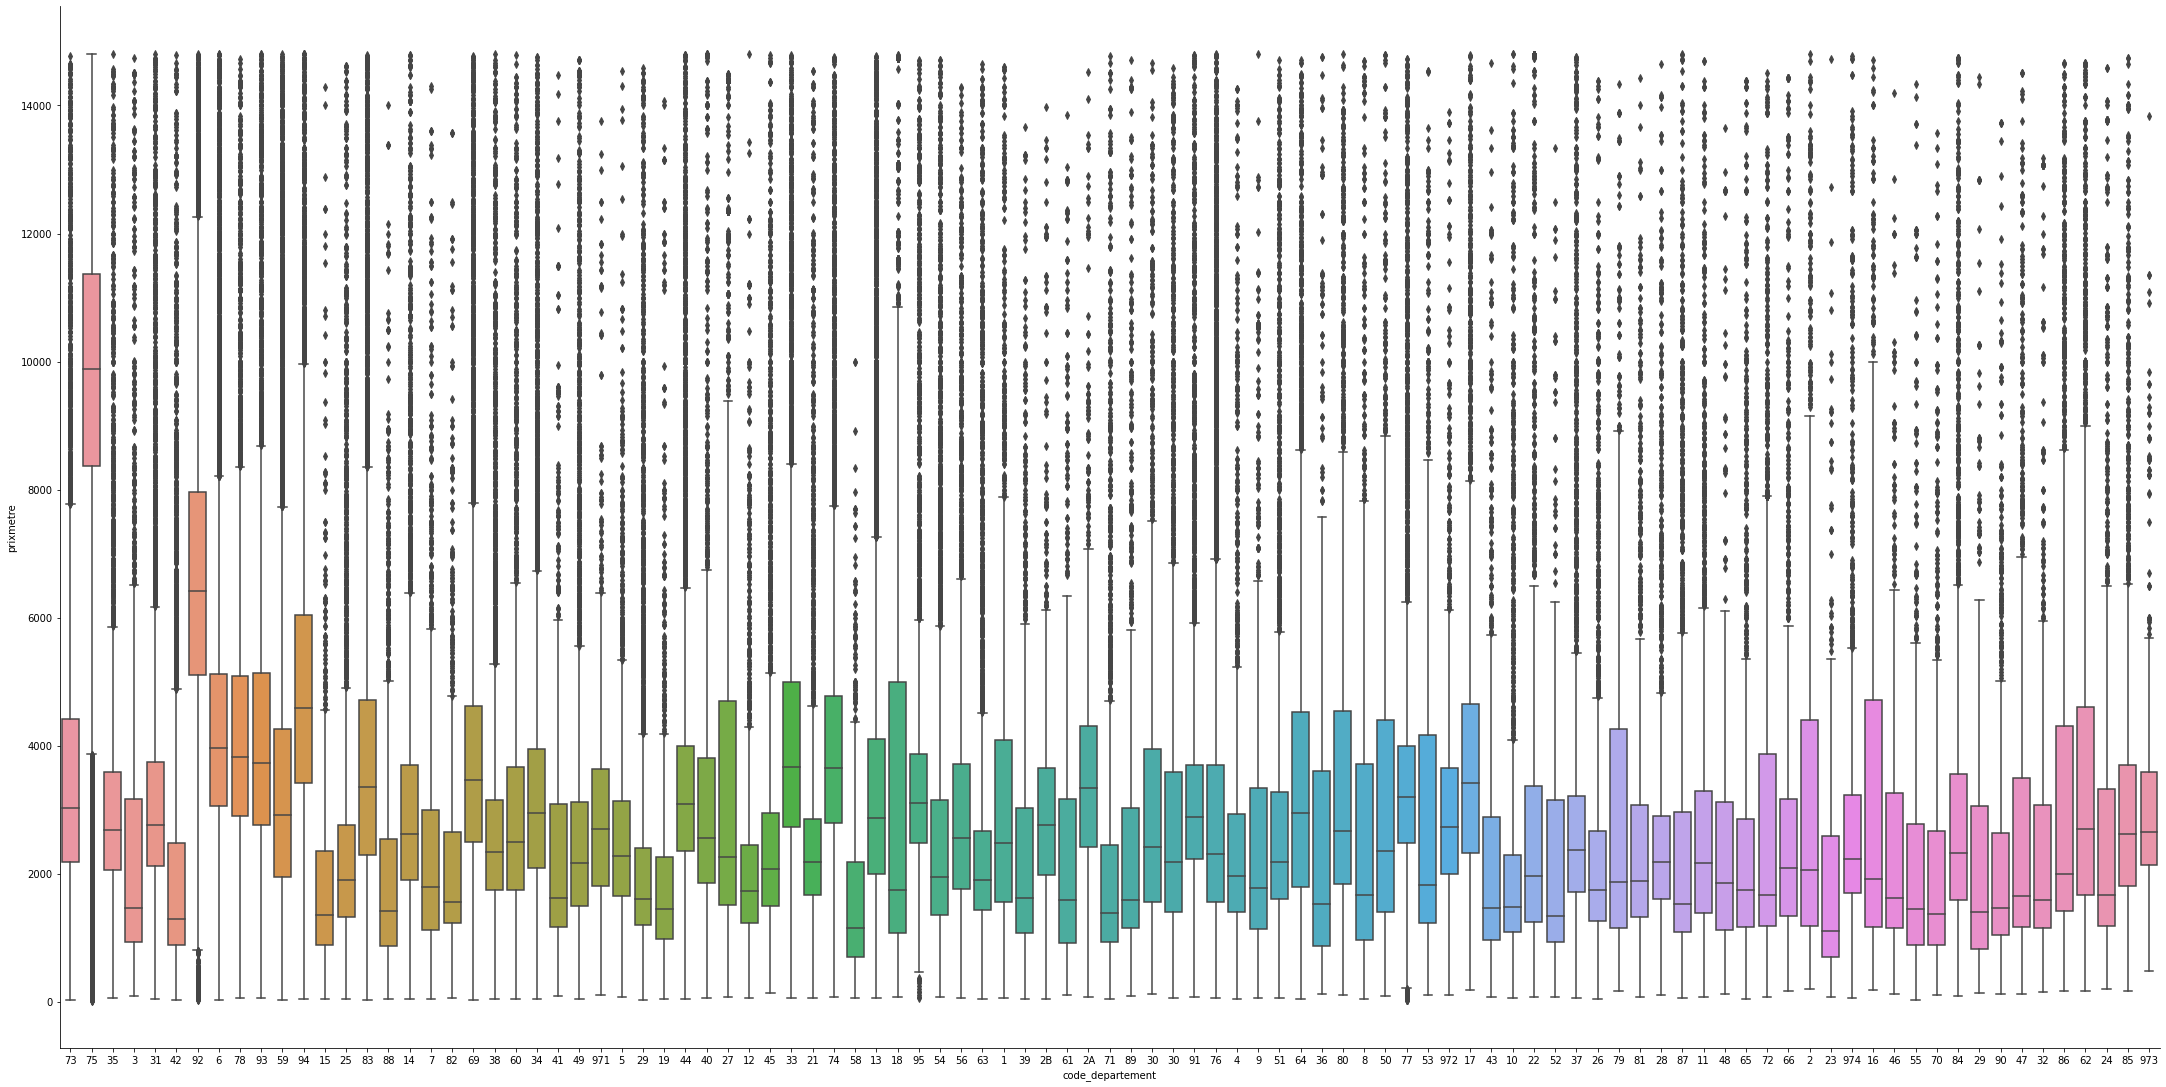

In [ ]:
sns.catplot(x='code_departement', y='prixmetre', data=A_19_int_outF1, kind="box",height=15, aspect=2 ) #showfliers=False

In [ ]:
A_19_int6[A_19_int6['code_departement']==29]['prixmetre'].hist(bins=100)

In [ ]:
def drop_quant_area(df, col, area, quant_inf = 0, quant_sup = 100):
    """
    cuts a dataframe df values
    """
    inf = df[col].quantile(q=quant_inf)
    sup = df[col].quantile(q=quant_sup)
    for i in df[area].unique():
        df_rep = df.drop(df[(df[area] == i) & (df[col] <= inf) & (df[col] >= sup)].index, axis=0)

    return df_rep

In [ ]:
A1=A_19_int6.loc[(A_19_int6['id_mutation'] == '2019-1111475')]

In [ ]:
A1

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,prixmetre
2661037,2019-1111475,2019-04-03,1,Vente,10400000.00,1.00,NaN,CLOS LES SAULES,B045,77680.00,77390,Roissy-en-Brie,77,nan,NaN,77390000AI0010,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,0,2.00,Appartement,65.00,3.00,S,sols,NaN,NaN,7515.00,2.64,48.80,160000.00
2660955,2019-1111475,2019-04-03,1,Vente,10400000.00,1.00,NaN,CLOS LES SAULES,B045,77680.00,77390,Roissy-en-Brie,77,nan,NaN,77390000AI0010,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,0,2.00,Appartement,65.00,4.00,S,sols,NaN,NaN,7515.00,2.64,48.80,160000.00
2661050,2019-1111475,2019-04-03,1,Vente,10400000.00,1.00,NaN,CLOS LES SAULES,B045,77680.00,77390,Roissy-en-Brie,77,nan,NaN,77390000AI0010,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,0,2.00,Appartement,65.00,3.00,S,sols,NaN,NaN,7515.00,2.64,48.80,160000.00
2660951,2019-1111475,2019-04-03,1,Vente,10400000.00,1.00,NaN,CLOS LES SAULES,B045,77680.00,77390,Roissy-en-Brie,77,nan,NaN,77390000AI0010,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,0,2.00,Appartement,65.00,4.00,S,sols,NaN,NaN,7515.00,2.64,48.80,160000.00
2661022,2019-1111475,2019-04-03,1,Vente,10400000.00,1.00,NaN,CLOS LES SAULES,B045,77680.00,77390,Roissy-en-Brie,77,nan,NaN,77390000AI0010,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,0,2.00,Appartement,65.00,4.00,S,sols,NaN,NaN,7515.00,2.64,48.80,160000.00
2660952,2019-1111475,2019-04-03,1,Vente,10400000.00,1.00,NaN,CLOS LES SAULES,B045,77680.00,77390,Roissy-en-Brie,77,nan,NaN,77390000AI0010,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,0,2.00,Appartement,65.00,3.00,S,sols,NaN,NaN,7515.00,2.64,48.80,160000.00
2661060,2019-1111475,2019-04-03,1,Vente,10400000.00,1.00,NaN,CLOS LES SAULES,B045,77680.00,77390,Roissy-en-Brie,77,nan,NaN,77390000AI0010,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,0,2.00,Appartement,65.00,3.00,S,sols,NaN,NaN,7515.00,2.64,48.80,160000.00
2661047,2019-1111475,2019-04-03,1,Vente,10400000.00,1.00,NaN,CLOS LES SAULES,B045,77680.00,77390,Roissy-en-Brie,77,nan,NaN,77390000AI0010,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,0,2.00,Appartement,65.00,4.00,S,sols,NaN,NaN,7515.00,2.64,48.80,160000.00
2661031,2019-1111475,2019-04-03,1,Vente,10400000.00,1.00,NaN,CLOS LES SAULES,B045,77680.00,77390,Roissy-en-Brie,77,nan,NaN,77390000AI0010,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,0,2.00,Appartement,65.00,3.00,S,sols,NaN,NaN,7515.00,2.64,48.80,160000.00
2660954,2019-1111475,2019-04-03,1,Vente,10400000.00,1.00,NaN,CLOS LES SAULES,B045,77680.00,77390,Roissy-en-Brie,77,nan,NaN,77390000AI0010,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan,nan,0,2.00,Appartement,65.00,3.00,S,sols,NaN,NaN,7515.00,2.64,48.80,160000.00


In [ ]:
A1.shape # Duplicates id_mutation

(57, 41)

In [ ]:
Q1 = A_19_int3['prixmetre'].quantile(0.25)
Q3 = A_19_int3['prixmetre'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (A_19_int3['prixmetre'] >= Q1 - 1.5 * IQR) & (A_19_int3['prixmetre'] <= Q3 + 1.5 *IQR)
A_19_int_out111=A_19_int3.loc[filter]

In [ ]:
A_19_int_out111[A_19_int_out111['code_departement']==75].shape

(32965, 41)